In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "../../data/adhd-beliefs-pt/adhd-beliefs-pt-cleaned.pkl"
df = pd.read_pickle(file_path)
df.head()

sex adhd_diagnosis  age     education             occupation  \
0  Masculino      Não tenho   21  Licenciatura              Estudante   
1   Feminino      Não tenho   22  Licenciatura              Estudante   
2   Feminino      Não tenho   53  Licenciatura            Trabalhador   
3   Feminino      Não tenho   23      Mestrado  Trabalhador-estudante   
4   Feminino      Não tenho   20  Licenciatura              Estudante   

                 dialect forgetting_objects forgetting_responsabilities  \
0  Português de Portugal                  2                           3   
1  Português de Portugal                  3                           3   
2  Português de Portugal                  3                           4   
3  Português de Portugal                  2                           1   
4  Português de Portugal                  4                           2   

  emotion_management emotion_reactions  ... need_fast_talk_interest  \
0                  2                 3  ...                       2   
1                  4                 4  ...                       1   
2                  4                 3  ...                       1   
3                  4                 4  ...                       1   
4                  2                 3  ...                       2   

  need_fast_talk_information speaking_before_thinking something_to_add  \
0                          1                        1                3   
1                          1                        3                4   
2                          1                        3                3   
3                          1                        4                4   
4                          2                        4                3   

  something_to_add_timid something_to_add_impulsive  \
0                      4                          2   
1                      4                          2   
2                      1                          2   
3                      4                          2   
4                      4                          3   

                                    special_interest  \
0                                                NaN   
1  Adoro cozinhar, porque sinto que é a forma ide...   
2                                                NaN   
3  Gosto de ver séries porque relatam relações sa...   
4                                                NaN   

                                         diary_entry  \
0                                                NaN   
1  Hoje foi um dia bastante normal, como ontem fi...   
2                                                NaN   
3  Os eventos que considero mais relevantes serão...   
4                                                NaN   

                                 selfdefining_memory  \
0                                                NaN   
1  Quando era mais nova, eu tinha uma professora ...   
2                                                NaN   
3                                          Não tenho   
4                                                NaN   

                                         empty_sheet  
0                                                NaN  
1  Recentemente tenho pensado muito no impacto qu...  
2                                                NaN  
3  Este questionário foi um pouco extenso. Meu au...  
4                                                NaN  

[5 rows x 60 columns]

#### Commonly used dictionaries

In [3]:
column_descriptive_names = {
    "special_interest": "Special Interest",
    "diary_entry": "Diary Entry",
    "selfdefining_memory": "Self-Defining Memory",
    "empty_sheet": "Free Writing",
}

In [4]:
feature_map = {
    "forgetting_objects": "Forgetting Objects",
    "forgetting_responsabilities": "Forgetting Responsibilities",
    "emotion_management": "Emotion Management",
    "emotion_reactions": "Emotion Reactions",
    "emotion_choices": "Emotion Choices",
    "emotion_intense_reaction": "Intense Emotional Reactions",
    "strong_mood_swings": "Strong Mood Swings",
    "control_mood_swings": "Control Over Mood Swings",
    "mood_swings_outside_consequence": "Mood Swings with Consequences",
    "justice_sense": "Sense of Justice",
    "defend_beliefs": "Defending Beliefs",
    "express_writing": "Expressing Through Writing",
    "topic_change_involuntary": "Involuntary Topic Changes",
    "related_topic": "Related Topics",
    "topic_change_unrealized": "Unrealized Topic Changes",
    "parallel_topic": "Parallel Topics",
    "nonlinear_storytelling": "Nonlinear Storytelling",
    "excessive_details": "Excessive Details",
    "forgetting_mid_conversation": "Forgetting Mid-Conversation",
    "talkback": "Talkback",
    "talkback_authority": "Talkback to Authority",
    "talkback_comfortable": "Comfortable Talkback",
    "interrupting_involuntary": "Involuntary Interrupting",
    "excited_opinion": "Excited Opinions",
    "want_interrupt": "Want to Interrupt",
    "want_interrupt_control": "Control Over Interrupting",
    "called_out_expressing": "Called Out for Expressing",
    "called_out_exalted": "Called Out for Being Exalted",
    "called_out_talking_loud": "Called Out for Talking Loudly",
    "called_out_nonlinear_talk": "Called Out for Nonlinear Talk",
    "called_out_nonlinear_write": "Called Out for Nonlinear Writing",
    "called_out_gestures": "Called Out for Gestures",
    "called_out_talking": "Called Out for Talking",
    "detailed_opinions": "Detailed Opinions",
    "detailed_opinions_interest": "Detailed Opinions on Interests",
    "detailed_opinions_people": "Detailed Opinions on People",
    "detailed_opinions_misunderstood": "Misunderstood Detailed Opinions",
    "swearing": "Swearing",
    "swearing_anywhere": "Swearing Anywhere",
    "swearing_casual": "Casual Swearing",
    "talk_fast": "Talking Fast",
    "talk_fast_unrealized": "Unrealized Fast Talking",
    "talk_fast_uncontrolled": "Uncontrolled Fast Talking",
    "called_out_talk_fast": "Called Out for Talking Fast",
    "need_fast_talk_interest": "Need for Fast Talking on Interests",
    "need_fast_talk_information": "Need for Fast Talking on Information",
    "speaking_before_thinking": "Speaking Before Thinking",
    "something_to_add": "Something to Add",
    "something_to_add_timid": "Timid Additions",
    "something_to_add_impulsive": "Impulsive Additions",
}

# Dataset Overview

## Data Distribution

### ADHD Diagnosis Distribution

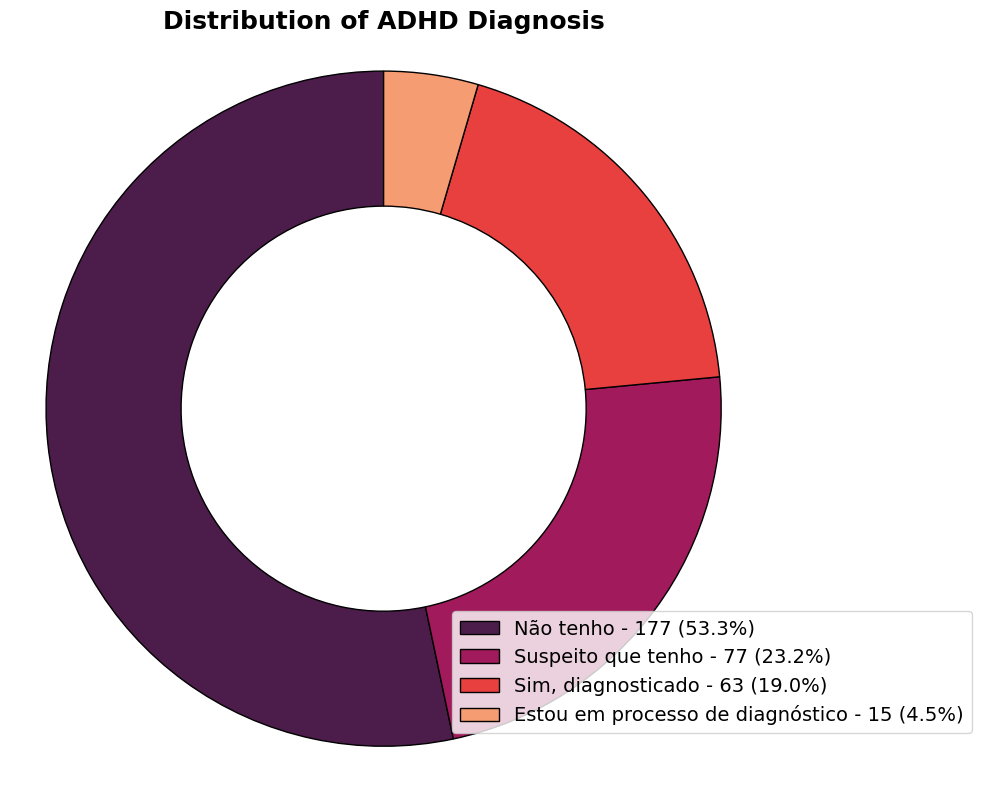

In [5]:
adhd_counts = df["adhd_diagnosis"].value_counts()
adhd_labels = [
    f"{label} - {count} ({count / adhd_counts.sum() * 100:.1f}%)"
    for label, count in adhd_counts.items()
]

# Make a donut chart of the adhd_diagnosis variable
plt.figure(figsize=(10, 8))

# Create the donut chart
wedges, texts = plt.pie(
    adhd_counts,
    startangle=90,
    colors=sns.color_palette("rocket", len(adhd_counts)),
    wedgeprops={"edgecolor": "black", "width": 0.4},  # width < 1 creates the donut hole
)

# Add a legend with percentages
plt.legend(
    wedges,
    adhd_labels,
    loc="lower right",
    bbox_to_anchor=(1.3, 0.05),
    fontsize=14,
)

# Add title and styling
plt.title("Distribution of ADHD Diagnosis", fontsize=18, fontweight="bold")
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular

# Save the figure
plt.tight_layout()
plt.savefig("data/adhd_diagnosis_distribution_donut.png", dpi=300, bbox_inches="tight")
plt.show()

### Age Profile of the Dataset

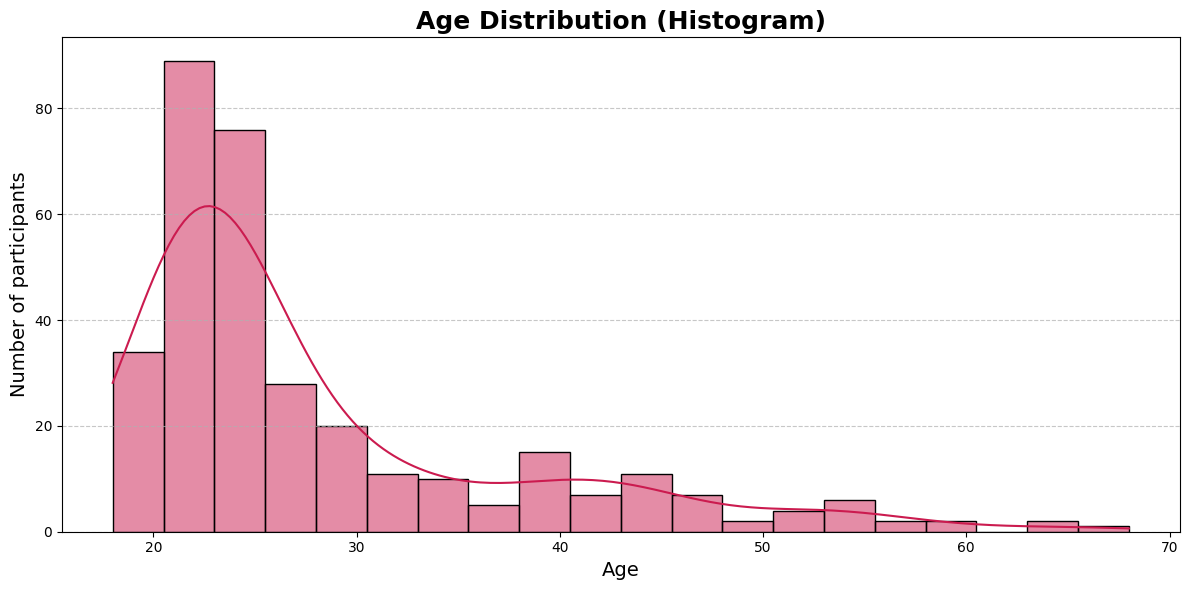

In [6]:
# Age distribution histogram
plt.figure(figsize=(12, 6))
sns.histplot(df["age"], bins=20, kde=True, color=sns.color_palette("rocket", 1)[0])
plt.title("Age Distribution (Histogram)", fontsize=18, fontweight="bold")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of participants", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig("data/age_distribution_histogram.png", dpi=300, bbox_inches="tight")
plt.show()

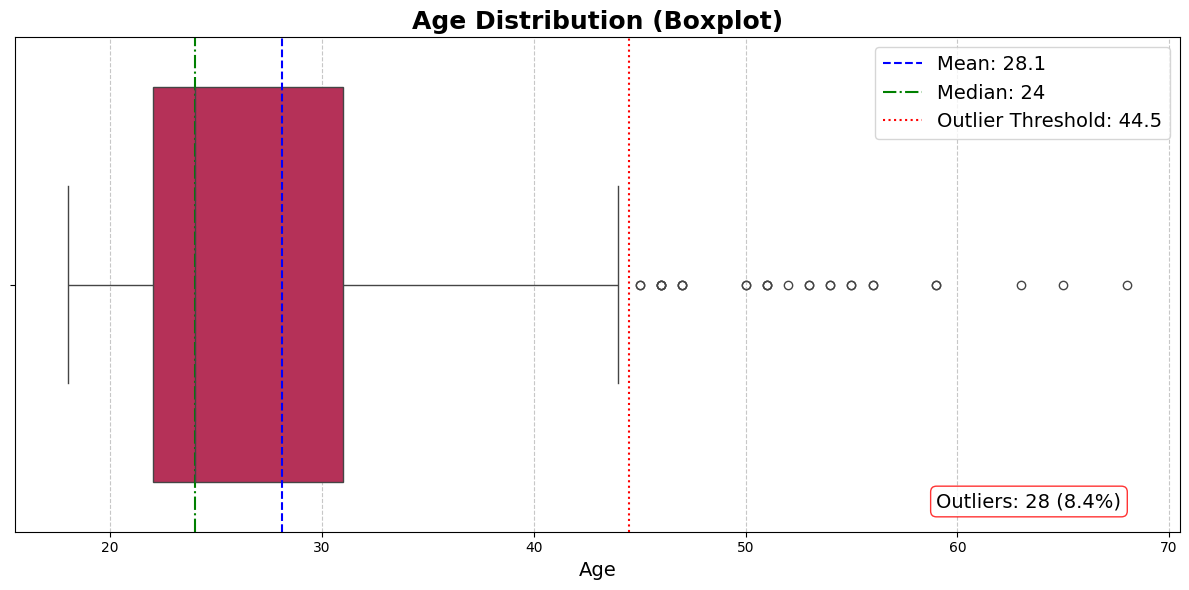

In [7]:
# Age distribution boxplot with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["age"], color=sns.color_palette("rocket", 1)[0])

# Calculate mean, median, and outlier threshold
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)
iqr = q3 - q1
outlier_threshold = q3 + 1.5 * iqr

mean_age = df["age"].mean()
median_age = df["age"].median()

# Add reference lines
plt.axvline(mean_age, color='blue', linestyle="--", label=f"Mean: {mean_age:.1f}")
plt.axvline(median_age, color='green', linestyle="-.", label=f"Median: {median_age:.0f}")
plt.axvline(outlier_threshold, color='red', linestyle=":", label=f"Outlier Threshold: {outlier_threshold:.1f}")

plt.title("Age Distribution (Boxplot)", fontsize=18, fontweight="bold")
plt.xlabel("Age", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)

# Identify and count outliers
outliers = df[df["age"] > outlier_threshold]
outlier_count = len(outliers)
outlier_percent = (outlier_count / len(df)) * 100

# Add annotation about outliers
plt.annotate(
    f"Outliers: {outlier_count} ({outlier_percent:.1f}%)",
    xy=(0.95, 0.05),
    xycoords='axes fraction',
    fontsize=14,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8),
    ha='right'
)

plt.tight_layout()
plt.savefig("data/age_distribution_boxplot_with_outliers.png", dpi=300, bbox_inches="tight")
plt.show()

### Sociodemographic Characteristics

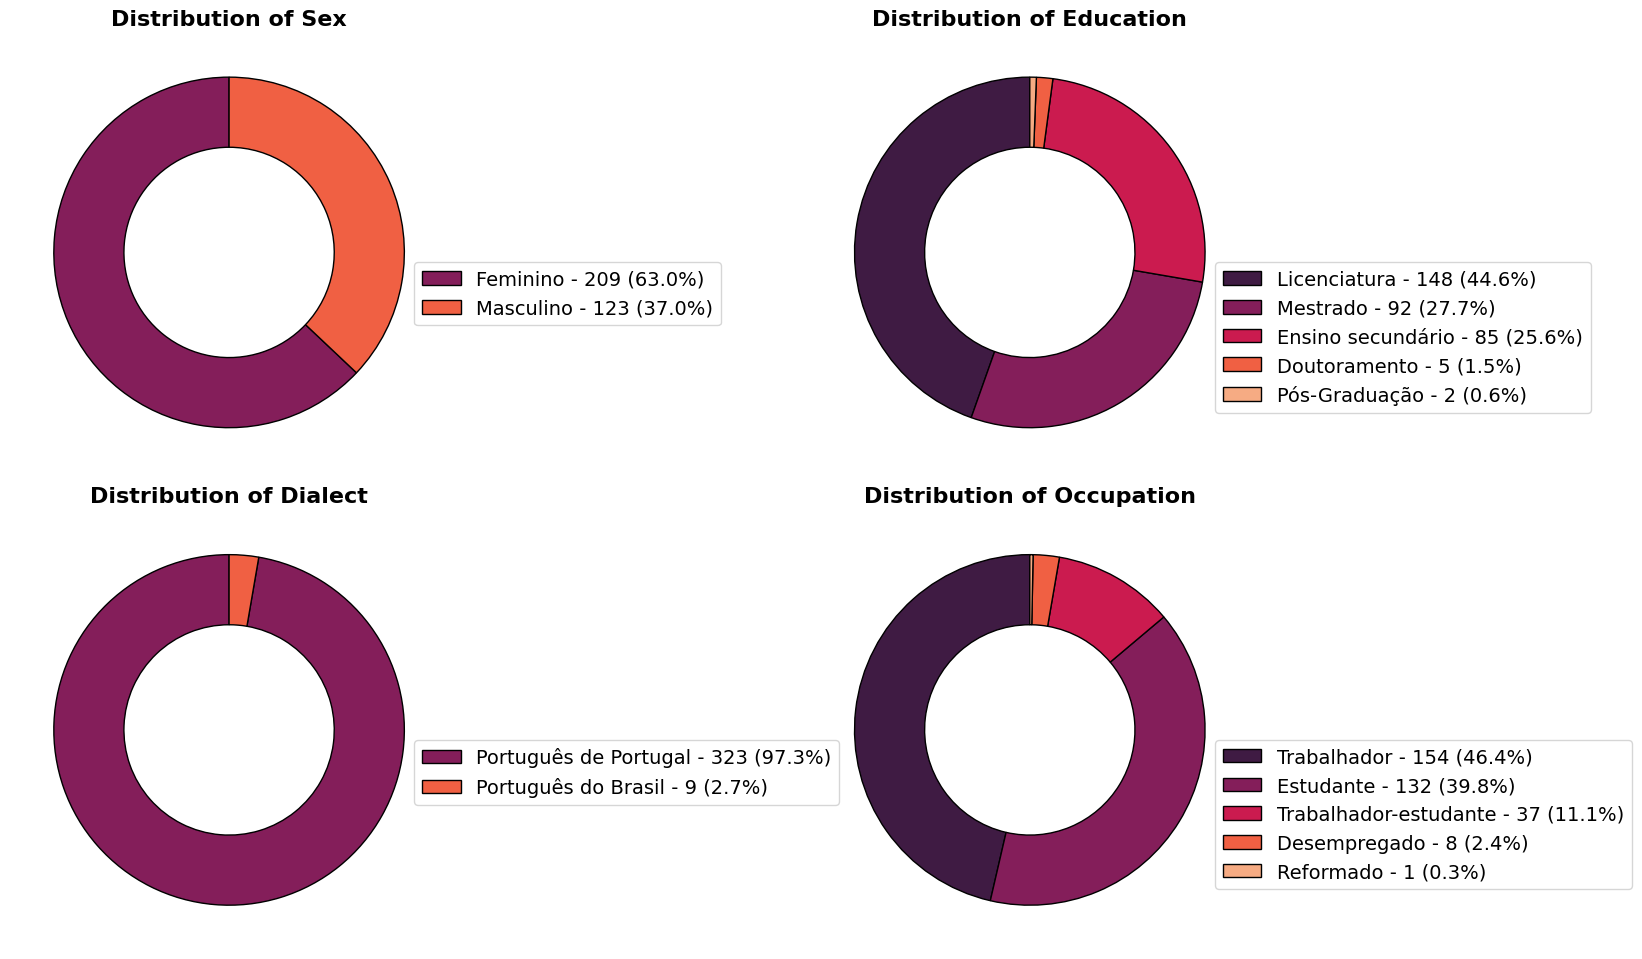

In [8]:
# Define labels for the legends
sex_counts = df["sex"].value_counts()
sex_labels = [
    f"{label} - {count} ({count / sex_counts.sum() * 100:.1f}%)"
    for label, count in sex_counts.items()
]
education_counts = df["education"].value_counts()
education_labels = [
    f"{label} - {count} ({count / education_counts.sum() * 100:.1f}%)"
    for label, count in education_counts.items()
]
occupation_counts = df["occupation"].value_counts()
occupation_labels = [
    f"{label} - {count} ({count / occupation_counts.sum() * 100:.1f}%)"
    for label, count in occupation_counts.items()
]
dialect_counts = df["dialect"].value_counts()
dialect_labels = [
    f"{label} - {count} ({count / dialect_counts.sum() * 100:.1f}%)"
    for label, count in dialect_counts.items()
]

# Create a figure with a uniform grid layout
fig1 = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, figure=fig1)
#fig1.suptitle("Demographic Data Distribution", fontsize=18, fontweight="bold")

# Donut chart for distribution of sex
ax1 = fig1.add_subplot(gs[0, 0])
ax1.pie(
    sex_counts,
    startangle=90,
    colors=sns.color_palette("rocket", len(sex_counts)),
    wedgeprops={"edgecolor": "black", "width": 0.4},  # Add width for donut effect
)
ax1.set_title("Distribution of Sex", fontsize=16, fontweight="bold")
ax1.legend(labels=sex_labels, loc="upper left", bbox_to_anchor=(0.9, 0.5), fontsize=14)

# Donut chart for distribution of education
ax2 = fig1.add_subplot(gs[0, 1])
ax2.pie(
    education_counts,
    startangle=90,
    colors=sns.color_palette("rocket", len(education_counts)),
    wedgeprops={"edgecolor": "black", "width": 0.4},  # Add width for donut effect
)
ax2.set_title("Distribution of Education", fontsize=16, fontweight="bold")
ax2.legend(
    labels=education_labels, loc="upper left", bbox_to_anchor=(0.9, 0.5), fontsize=14
)

# Donut chart for distribution of dialect
ax5 = fig1.add_subplot(gs[1, 0])
ax5.pie(
    dialect_counts,
    startangle=90,
    colors=sns.color_palette("rocket", len(dialect_counts)),
    wedgeprops={"edgecolor": "black", "width": 0.4},  # Add width for donut effect
)
ax5.set_title("Distribution of Dialect", fontsize=16, fontweight="bold")
ax5.legend(
    labels=dialect_labels, loc="upper left", bbox_to_anchor=(0.9, 0.5), fontsize=14
)

# Donut chart for distribution of occupation
ax4 = fig1.add_subplot(gs[1, 1])
ax4.pie(
    occupation_counts,
    startangle=90,
    colors=sns.color_palette("rocket", len(occupation_counts)),
    wedgeprops={"edgecolor": "black", "width": 0.4},  # Add width for donut effect
)
ax4.set_title("Distribution of Occupation", fontsize=16, fontweight="bold")
ax4.legend(
    labels=occupation_labels, loc="upper left", bbox_to_anchor=(0.9, 0.5), fontsize=14
)

plt.tight_layout(rect=[0, 0, 1.2, 0.97])
plt.savefig("data/demographic_data_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

### ADHD Diagnosis Patterns by Sex

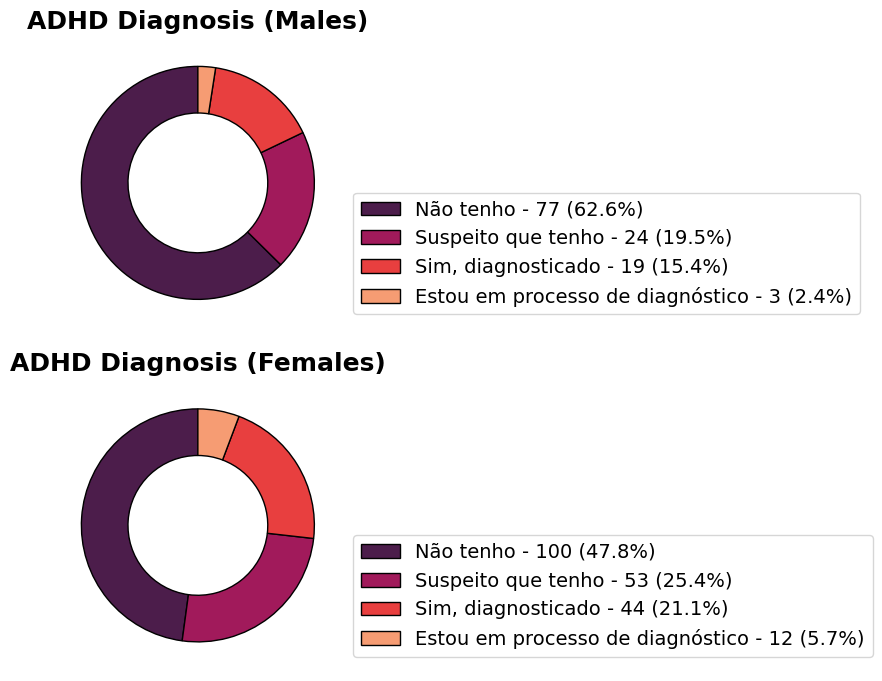

In [9]:
# Filter data by sex
male_data = df[df["sex"] == "Masculino"]["adhd_diagnosis"].value_counts()
female_data = df[df["sex"] == "Feminino"]["adhd_diagnosis"].value_counts()

# Calculate percentages for male and female data
male_labels = [
    f"{label} - {count} ({count / male_data.sum() * 100:.1f}%)"
    for label, count in male_data.items()
]
female_labels = [
    f"{label} - {count} ({count / female_data.sum() * 100:.1f}%)"
    for label, count in female_data.items()
]

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 7))

# Donut chart for males
axes[0].pie(
    male_data,
    startangle=90,
    colors=sns.color_palette("rocket", len(male_data)),
    wedgeprops={"edgecolor": "black", "width": 0.4},  # Donut effect
)
axes[0].set_title("ADHD Diagnosis (Males)", fontsize=18, fontweight="bold")
axes[0].legend(
    labels=male_labels, loc="upper left", bbox_to_anchor=(1, 0.5), fontsize=14
)

# Donut chart for females
axes[1].pie(
    female_data,
    startangle=90,
    colors=sns.color_palette("rocket", len(female_data)),
    wedgeprops={"edgecolor": "black", "width": 0.4},  # Donut effect
)
axes[1].set_title("ADHD Diagnosis (Females)", fontsize=18, fontweight="bold")
axes[1].legend(
    labels=female_labels, loc="upper left", bbox_to_anchor=(1, 0.5), fontsize=14
)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("data/adhd_diagnosis_by_sex.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 1400x800 with 0 Axes>

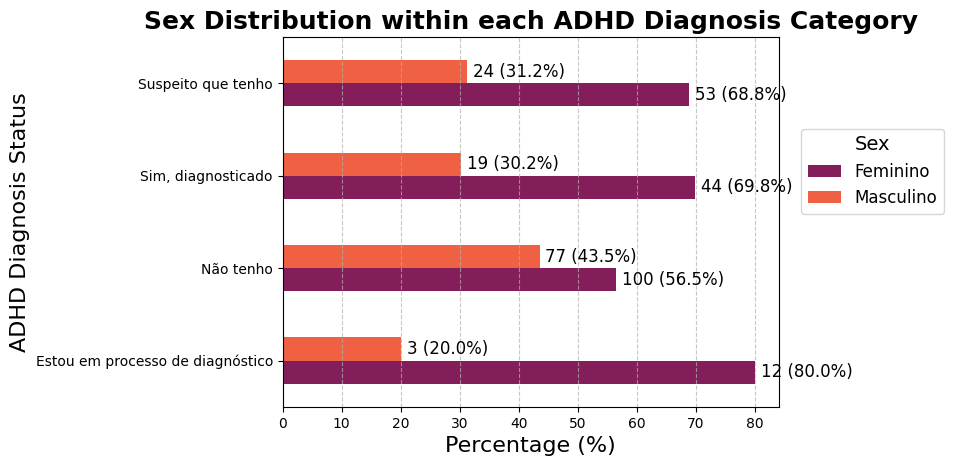

In [10]:
# Calculate the count of each diagnosis by gender
gender_adhd_counts = pd.crosstab(df['adhd_diagnosis'], df['sex'])

# Calculate percentages within each diagnosis category (row percentages)
gender_adhd_percent = gender_adhd_counts.div(gender_adhd_counts.sum(axis=1), axis=0) * 100

# Create a DataFrame for plotting
gender_adhd_percent_df = gender_adhd_percent.round(1)

# Create the plot with horizontal bars
plt.figure(figsize=(14, 8))
ax = gender_adhd_percent_df.plot(kind="barh", color=sns.color_palette("rocket", 2))

# Add title and labels
plt.title("Sex Distribution within each ADHD Diagnosis Category", fontsize=18, fontweight="bold")
plt.ylabel("ADHD Diagnosis Status", fontsize=16)
plt.xlabel("Percentage (%)", fontsize=16)

# Customize grid and rotation of labels
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.yticks(rotation=0)

# Add value labels on each bar with count and percentage
for i, container in enumerate(ax.containers):
    col_name = container.get_label()
    for j, val in enumerate(container):
        # Get the absolute count from the original counts dataframe
        count = gender_adhd_counts.iloc[j, i]
        # Get the percentage
        percentage = gender_adhd_percent_df.iloc[j, i]
        # Display both count and percentage
        ax.text(
            val.get_width() + 1,  # Position just after the end of the bar
            val.get_y() + val.get_height()/2,  # Vertical center of the bar
            f"{count} ({percentage:.1f}%)",  # Text with count and percentage
            va='center',
            fontsize=12,
        )

# Add legend with better positioning
plt.legend(
    title="Sex",
    fontsize=12,
    title_fontsize=14,
    loc="lower right",
    bbox_to_anchor=(1.35, 0.5),  # Adjust position to the right
)

# Adjust layout and save
#plt.tight_layout()
plt.savefig(
    "data/sex_distribution_within_adhd_diagnosis.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


### ADHD Diagnosis Patterns by Age

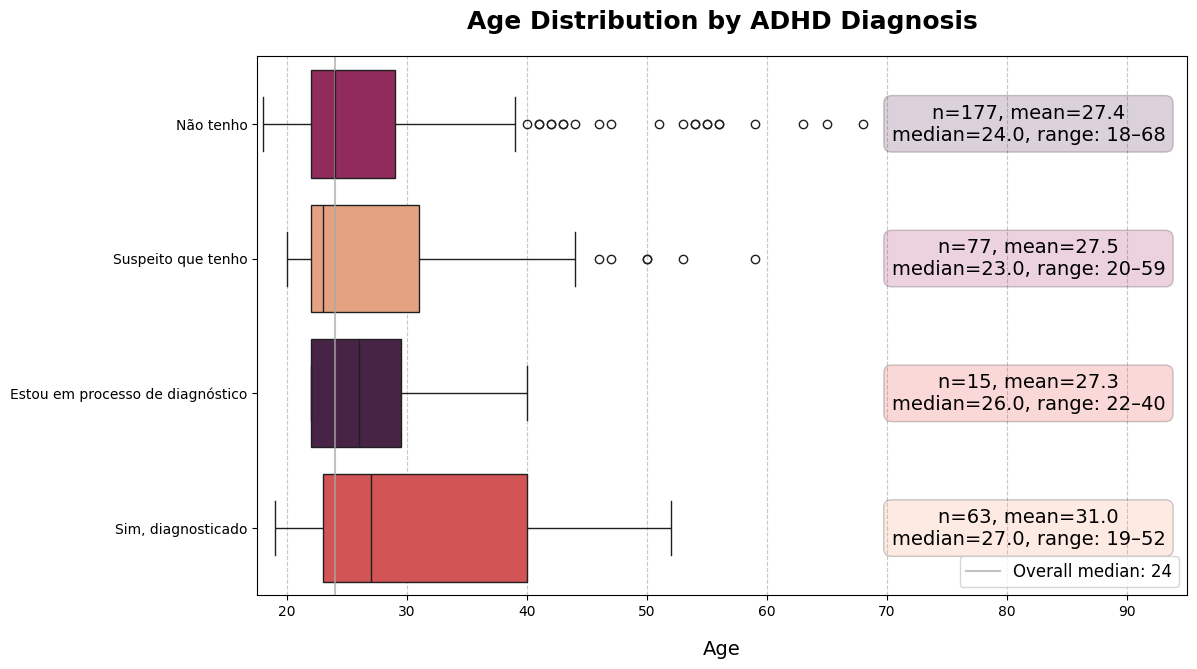

In [11]:
plt.figure(figsize=(12, 7))

# Explicitly define the order to match boxplot categories
order = df['adhd_diagnosis'].unique()

ax = sns.boxplot(
    data=df,
    y="adhd_diagnosis",
    x="age",
    hue="adhd_diagnosis",
    palette="rocket",
    order=order
)

# Add vertical line for overall median age
overall_median_age = df["age"].median()
ax.axvline(overall_median_age, color='darkgray', linestyle='-', alpha=0.7, label=f'Overall median: {overall_median_age:.0f}')

# Correctly annotate statistics next to each box
for i, diagnosis in enumerate(order):
    y_pos = i
    subset = df[df['adhd_diagnosis'] == diagnosis]['age']
    
    annotation = (
        f"n={len(subset)}, mean={subset.mean():.1f}\n"
        f"median={subset.median():.1f}, range: {subset.min()}–{subset.max()}"
    )

    # Position the annotation at the right end of the plot
    ax.annotate(
        annotation,
        xy=(ax.get_xlim()[1] * 1.16, y_pos),  # Adjusted x position for better visibility
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="center",
        fontsize=14,
        bbox=dict(boxstyle="round,pad=0.4", fc=sns.color_palette("rocket", 4)[i], alpha=0.2)
    )

ax.set_xlim(17.5, 95)
# Customize plot
ax.set_title("Age Distribution by ADHD Diagnosis", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel("Age", fontsize=14, labelpad=15)
ax.set_ylabel("")
ax.grid(axis="x", linestyle="--", alpha=0.7)
ax.legend(loc='lower right', fontsize=12)

#plt.tight_layout()
plt.savefig("data/age_distribution_adhd_diagnosis.png", dpi=300, bbox_inches="tight")
plt.show()


### ADHD Diagnosis Patterns by Education

/tmp/ipykernel_8067/3360075065.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


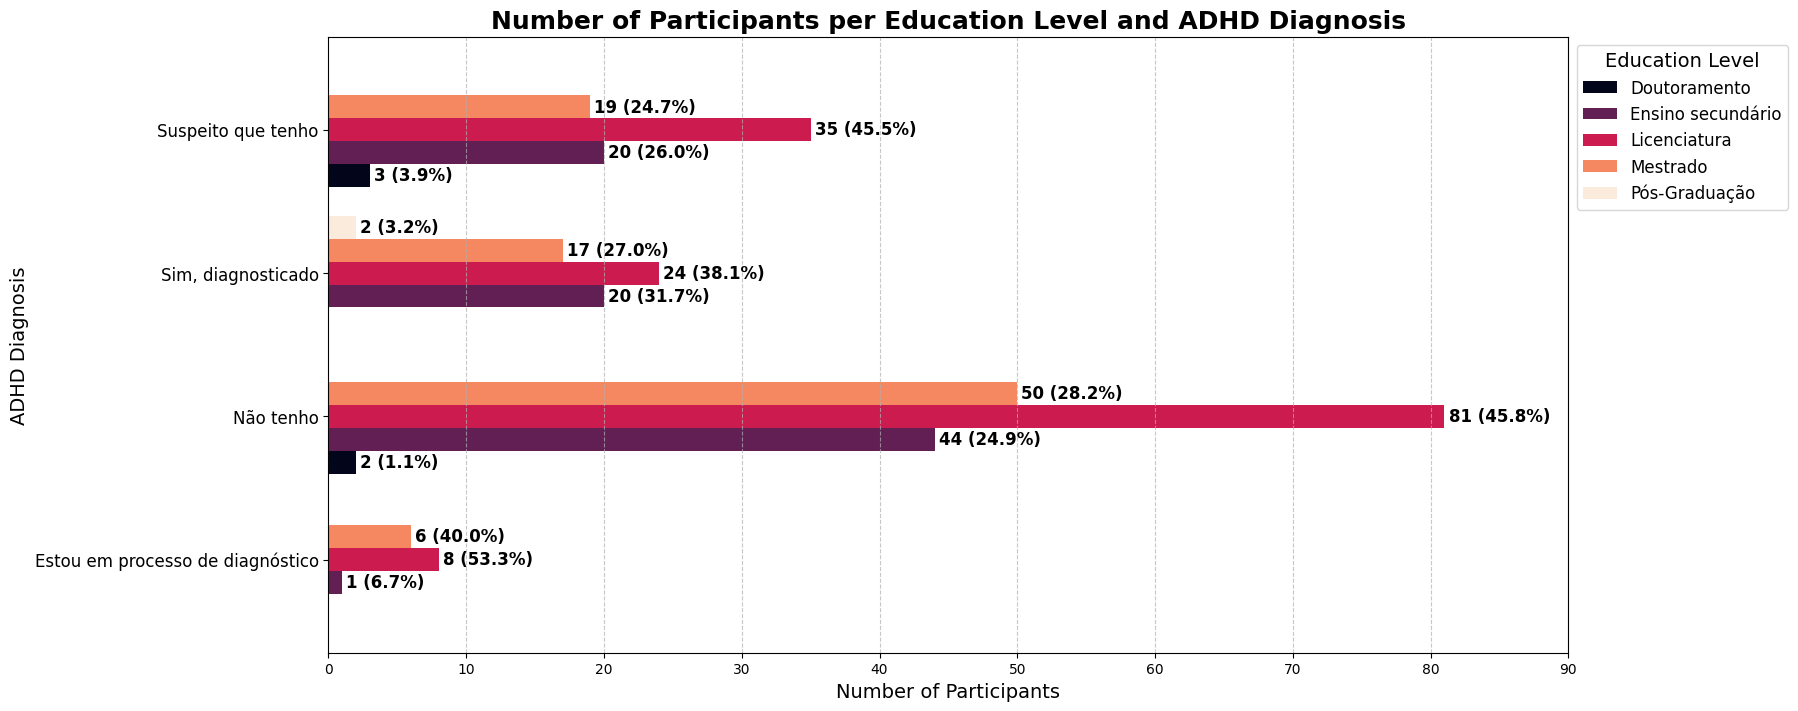

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create pivot table
pivot_table = df.pivot_table(
    index="adhd_diagnosis",
    columns="education",
    values="age",
    aggfunc="count",
).fillna(0)

fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind="barh", stacked=False, ax=ax, colormap="rocket", width=0.8)

# Annotate with row‐percentages
for container in ax.containers:
    # container corresponds to one education level
    for bar in container:
        count = bar.get_width()
        if count > 0:
            # get the vertical center of the bar
            y = bar.get_y() + bar.get_height() / 2
            # map back to the integer row index
            row_idx = int(np.round(y))
            # diagnosis label (e.g. "Yes" or "No")
            diag_label = pivot_table.index[row_idx]
            # total participants for that diagnosis
            row_total = pivot_table.loc[diag_label].sum()
            # compute % within that row
            pct = (count / row_total) * 100
            ax.annotate(
                f"{int(count)} ({pct:.1f}%)",
                xy=(count, y),
                xytext=(3, 0),
                textcoords="offset points",
                ha="left",
                va="center",
                fontsize=12,
                fontweight="bold"
            )

# Customizing the plot
ax.set_title(
    "Number of Participants per Education Level and ADHD Diagnosis",
    fontsize=18,
    fontweight="bold"
)
ax.set_ylabel("ADHD Diagnosis", fontsize=14)
ax.set_xlabel("Number of Participants", fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
ax.legend(
    title="Education Level",
    fontsize=12,
    title_fontsize=14,
    loc='upper left',
    bbox_to_anchor=(1, 1)
)
ax.grid(axis="x", linestyle="--", alpha=0.7)
plt.xlim(0, 90)

# Adding spacing between groups
ax.set_ymargin(0.1)

#plt.tight_layout()
plt.savefig("data/adhd_diagnosis_education.png", dpi=300, bbox_inches="tight")
plt.show()


### ADHD Diagnosis Patterns by Occupation

/tmp/ipykernel_8067/2964622883.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


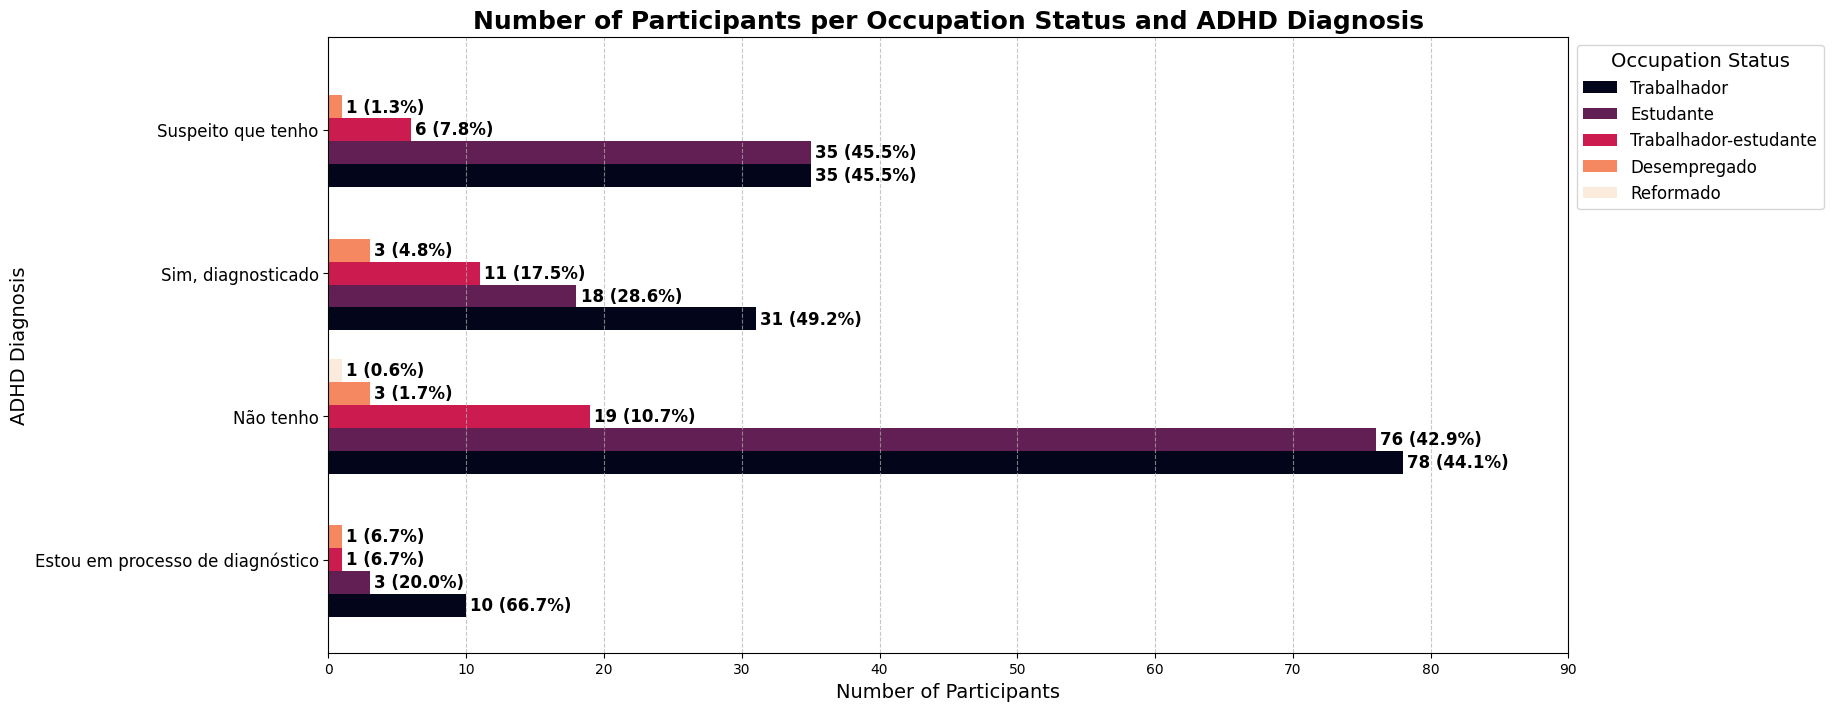

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create pivot table
pivot_table = df.pivot_table(
    index="adhd_diagnosis",
    columns="occupation",
    values="age",
    aggfunc="count",
).fillna(0)

# Explicitly define the order of occupations
occupation_order = [
    "Trabalhador", "Estudante", "Trabalhador-estudante", "Desempregado", "Reformado"
]
# Filter to only occupations present in the data
occupation_order = [occ for occ in occupation_order if occ in pivot_table.columns]
pivot_table = pivot_table[occupation_order]

# Set parameters
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind="barh", stacked=False, ax=ax, colormap="rocket", width=0.8)

# Annotate with row‐percentages
for container in ax.containers:
    # container corresponds to one occupation level
    for bar in container:
        count = bar.get_width()
        if count > 0:
            # get the vertical center of the bar
            y = bar.get_y() + bar.get_height() / 2
            # map back to the integer row index
            row_idx = int(np.round(y))
            # diagnosis label (e.g. "Yes" or "No")
            diag_label = pivot_table.index[row_idx]
            # total participants for that diagnosis
            row_total = pivot_table.loc[diag_label].sum()
            # compute % within that row
            pct = (count / row_total) * 100
            ax.annotate(
                f"{int(count)} ({pct:.1f}%)",
                xy=(count, y),
                xytext=(3, 0),
                textcoords="offset points",
                ha="left",
                va="center",
                fontsize=12,
                fontweight="bold"
            )

# Customizing the plot
ax.set_title(
    "Number of Participants per Occupation Status and ADHD Diagnosis",
    fontsize=18,
    fontweight="bold"
)
ax.set_ylabel("ADHD Diagnosis", fontsize=14)
ax.set_xlabel("Number of Participants", fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
ax.legend(
    title="Occupation Status",
    fontsize=12,
    title_fontsize=14,
    loc='upper left',
    bbox_to_anchor=(1, 1)
)
ax.grid(axis="x", linestyle="--", alpha=0.7)
plt.xlim(0, 90)

# Adding spacing between groups
ax.set_ymargin(0.1)

#plt.tight_layout()
plt.savefig("data/adhd_diagnosis_occupation.png", dpi=300, bbox_inches="tight")
plt.show()


### Engagement with Open-Ended Prompts

/tmp/ipykernel_8067/2599479938.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("adhd_diagnosis")[column]
/tmp/ipykernel_8067/2599479938.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_diagnosis = df.groupby("adhd_diagnosis").size().reset_index(name="total")
/tmp/ipykernel_8067/2599479938.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("adhd_diagnosis")[column]
/tmp/ipykernel_80

<Figure size 1400x800 with 0 Axes>

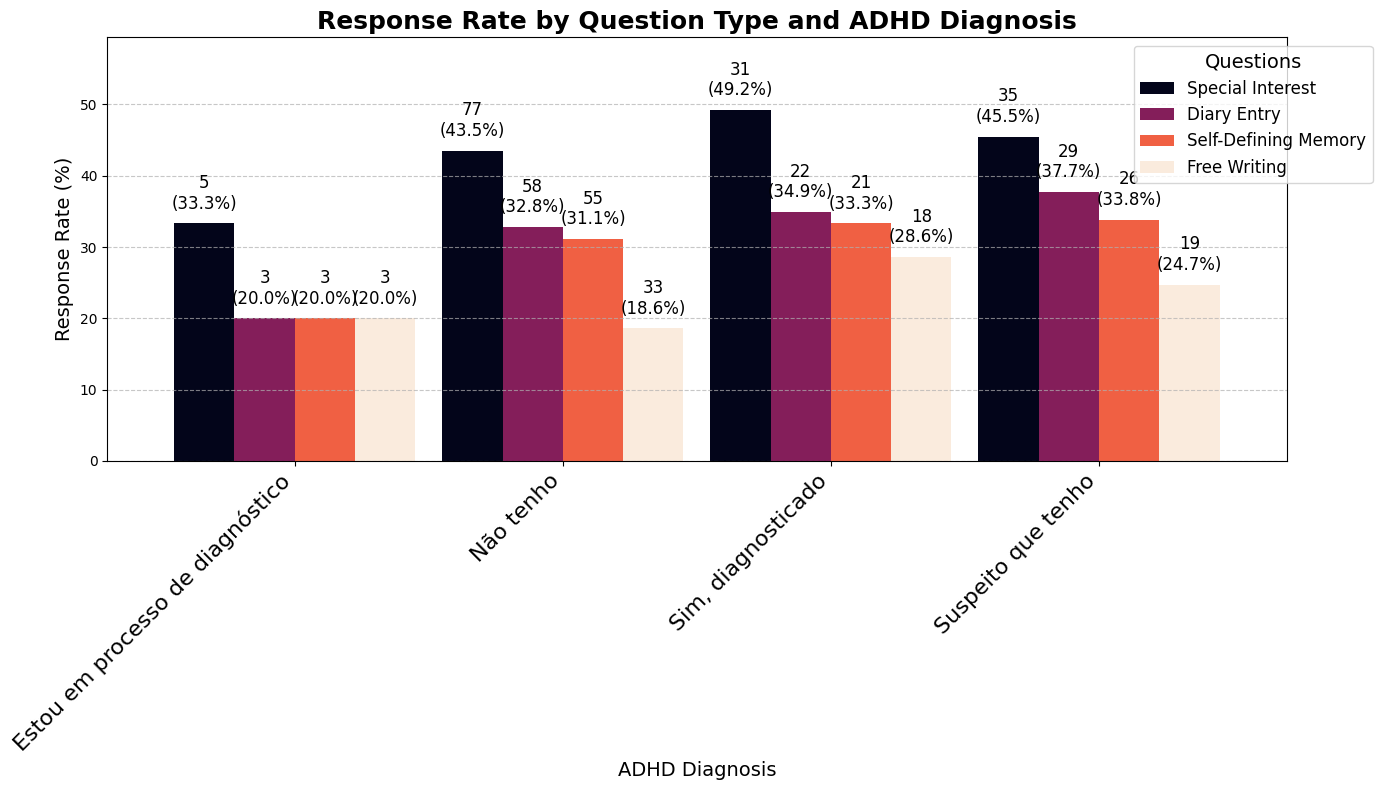

In [14]:
# Count non-empty entries and calculate percentages
def count_non_empty_entries(df, column):
    counts = (
        df.groupby("adhd_diagnosis")[column]
        .apply(lambda x: x.notna().sum())
        .reset_index(name="count")
    )
    # Calculate total counts per diagnosis group
    total_per_diagnosis = df.groupby("adhd_diagnosis").size().reset_index(name="total")
    # Merge the two dataframes
    result = pd.merge(counts, total_per_diagnosis, on="adhd_diagnosis")
    # Calculate percentage
    result["percentage"] = (result["count"] / result["total"] * 100).round(1)
    return result

# Create a stacked bar chart to compare response rates across all question types
plt.figure(figsize=(14, 8))  # Make the figure wider

# Get response rates for all question types
response_data = pd.DataFrame()
for column in column_descriptive_names.keys():
    data = count_non_empty_entries(df, column)
    data["question_type"] = column_descriptive_names[column]
    response_data = pd.concat([response_data, data])

# Create pivot table for plotting
pivot_data = response_data.pivot(
    index="adhd_diagnosis", columns="question_type", values="percentage"
).reset_index()

# Plot stacked bar chart with wider bars
ax = pivot_data.plot(
    x="adhd_diagnosis",
    y=[column_descriptive_names[col] for col in column_descriptive_names.keys()],
    kind="bar",
    stacked=False,
    figsize=(14, 8),
    width=0.9,  # Increased the width of the bars
    colormap="rocket",
)

# Customize the plot
plt.title(
    "Response Rate by Question Type and ADHD Diagnosis", fontsize=18, fontweight="bold"
)
plt.xlabel("ADHD Diagnosis", fontsize=14)
plt.ylabel("Response Rate (%)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Questions", fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.08, 1))
plt.xticks(rotation=45, ha="right", fontsize=16)

# Add value annotations with both count and percentage
for i, container in enumerate(ax.containers):
    question_type = list(column_descriptive_names.values())[i]
    for j, val in enumerate(container):
        # Get the diagnosis category
        diagnosis = pivot_data.iloc[j]['adhd_diagnosis']
        # Get the corresponding data for this question type and diagnosis
        data_row = response_data[(response_data['adhd_diagnosis'] == diagnosis) & 
                                 (response_data['question_type'] == question_type)]
        
        if not data_row.empty:
            count = data_row['count'].values[0]
            percentage = data_row['percentage'].values[0]
            # Add text with count and percentage
            ax.text(
                val.get_x() + val.get_width()/2,
                val.get_height() + 1.5,
                f"{count}\n({percentage:.1f}%)",
                ha="center",
                va="bottom",
                fontsize=12,
                fontweight="medium",
            )

# Adjust y-axis to make room for annotations
current_ylim = ax.get_ylim()
ax.set_ylim(0, current_ylim[1] * 1.15)

# Increase spacing between groups of bars
plt.tight_layout()
plt.savefig("data/response_rate_by_question_type.png", dpi=300, bbox_inches="tight")
plt.show()

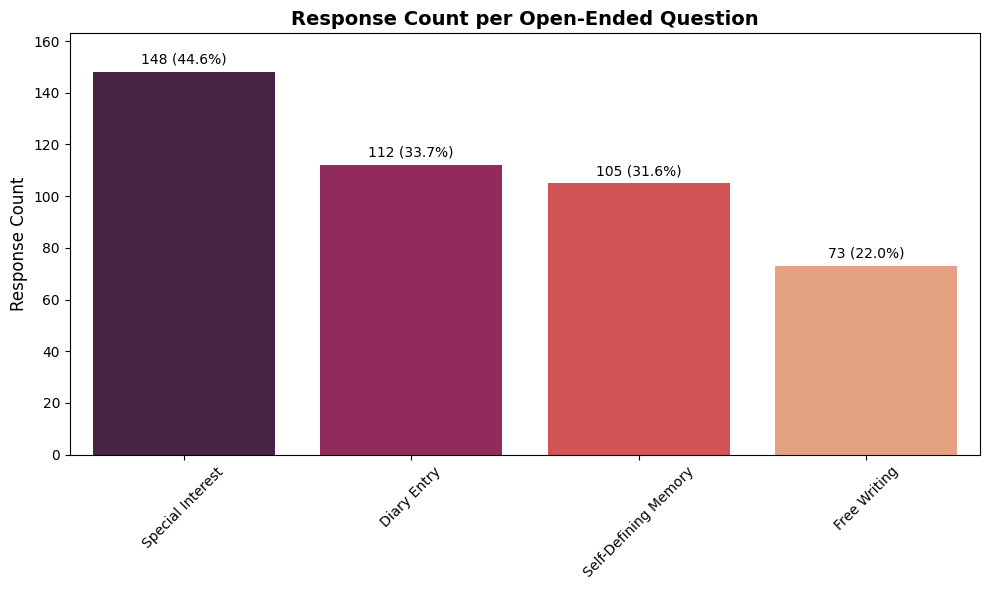

In [15]:
# Calculate the count of missing values for the selected columns
response_count = (
    df[["special_interest", "diary_entry", "selfdefining_memory", "empty_sheet"]]
    .notna()
    .sum()
)
response_rate = (response_count / len(df)) * 100

# Replace variable names with descriptive text
response_count.index = response_count.index.map(column_descriptive_names)
response_rate.index = response_rate.index.map(column_descriptive_names)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=response_count.index,
    y=response_count.values,
    hue=response_count.index,
    palette="rocket",
)

# Add value and percentage annotations on top of the bars
for i, (value, percentage) in enumerate(
    zip(response_count.values, response_rate.values)
):
    ax.text(
        i,
        value + 2,
        f"{value} ({percentage:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

# Adjust the y-axis limit
ax.set_ylim(0, response_count.max() + 15)

# Add meaningful labels and title
plt.title(
    "Response Count per Open-Ended Question", fontsize=14, fontweight="bold"
)
plt.xlabel("", fontsize=12)
plt.ylabel("Response Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.savefig("data/response_rate.png", dpi=300, bbox_inches="tight")
plt.show()

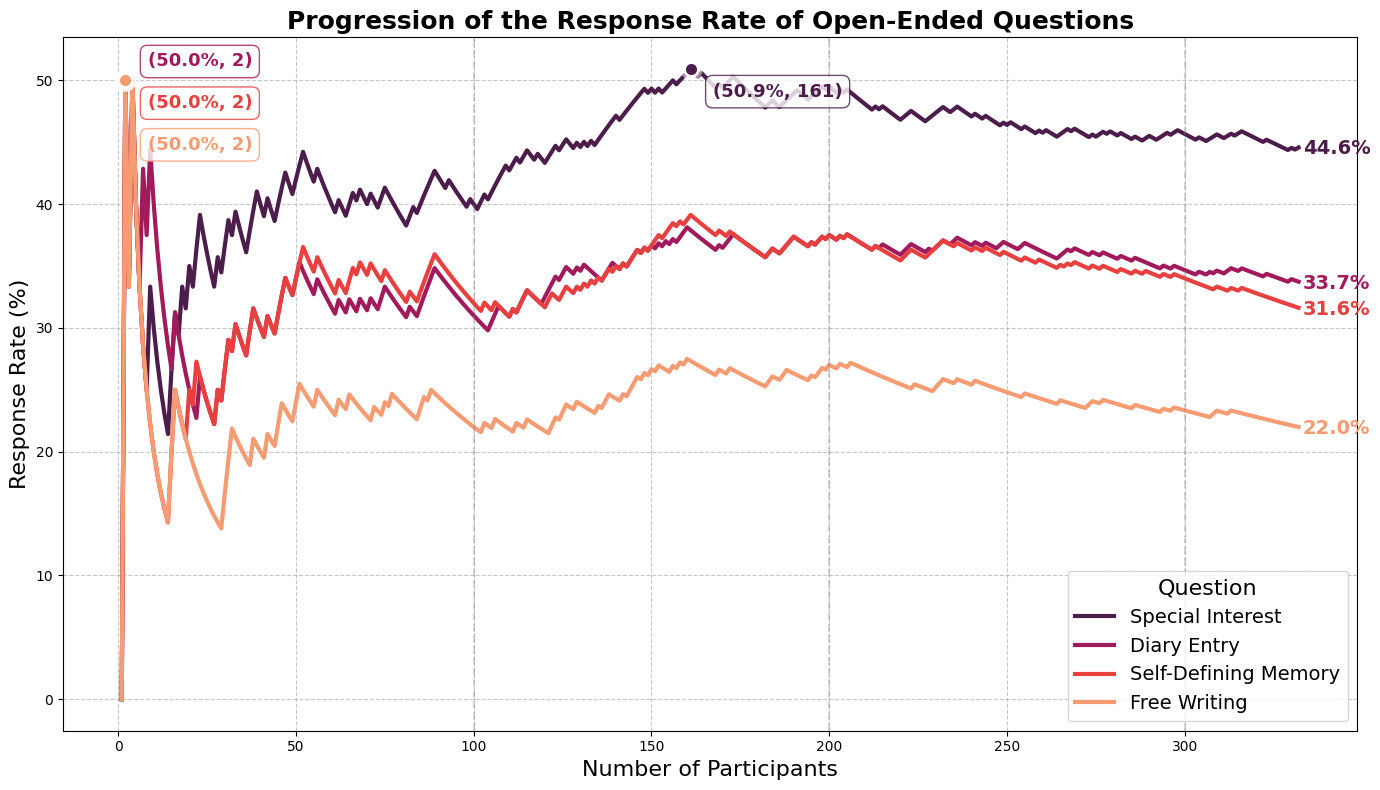

In [16]:
# Create a figure for the progression of response rates
plt.figure(figsize=(14, 8))

# Get the cumulative response counts for each question type
question_columns = ["special_interest", "diary_entry", "selfdefining_memory", "empty_sheet"]
descriptive_names = [column_descriptive_names[col] for col in question_columns]

# Create a cumulative count of responses over the dataset
cumulative_responses = {}
for col in question_columns:
    # Get non-null responses sorted by index
    responses = df[col].notna()
    # Calculate cumulative sum of responses
    cumulative_responses[col] = responses.cumsum()

# Calculate total number of entries at each point
total_entries = pd.Series(range(1, len(df) + 1))

# Calculate the percentage of responses at each point
for col in question_columns:
    # Convert to percentage
    cumulative_responses[col] = (cumulative_responses[col] / total_entries) * 100

# Plot the evolution of response rates
for i, col in enumerate(question_columns):
    plt.plot(
        range(1, len(df) + 1),
        cumulative_responses[col],
        linewidth=3,
        label=descriptive_names[i],
        color=sns.color_palette("rocket", 4)[i],
    )

# Add labels and formatting
plt.title("Progression of the Response Rate of Open-Ended Questions", fontsize=18, fontweight="bold")
plt.xlabel("Number of Participants", fontsize=16)
plt.ylabel("Response Rate (%)", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Question", fontsize=14, title_fontsize=16, loc='lower right')

# Mark final response rates with annotations
for i, col in enumerate(question_columns):
    final_rate = cumulative_responses[col].iloc[-1]
    plt.annotate(
        f"{final_rate:.1f}%",
        xy=(len(df), final_rate),
        xytext=(3, -5),
        textcoords="offset points",
        fontsize=14,
        fontweight="bold",
        color=sns.color_palette("rocket", 4)[i],
    )

# Add vertical lines for milestones (e.g., 100, 200, 300 participants)
milestones = [100, 200, 300]
for milestone in milestones:
    if milestone < len(df):
        plt.axvline(
            milestone,
            color="gray",
            linestyle="--",
            alpha=0.3,
            label=f"{milestone} participants" if milestone == milestones[0] else "",
        )

# Add dots and annotations for maximum response rate points with improved visibility
for i, col in enumerate(question_columns):
    # Find when the response rate was maximum
    max_rate_idx = cumulative_responses[col].idxmax()
    max_rate = cumulative_responses[col].max()
    
    # Plot a more visible dot at the maximum point
    plt.plot(
        max_rate_idx + 1,  # +1 because index starts at 0 but our x-axis starts at 1
        max_rate,
        'o',
        markersize=10,  # Increased marker size
        color=sns.color_palette("rocket", 4)[i],
        markeredgecolor='white',
        markeredgewidth=2.0,  # Made edge thicker
        zorder=10,  # Ensure dots appear on top of lines
    )
    
    # Add a halo effect to make dots more visible
    plt.plot(
        max_rate_idx + 1,
        max_rate,
        'o',
        markersize=15,  # Larger outer circle
        color='white',
        alpha=0.4,
        zorder=9,
    )
    
    # Improved annotation with better visibility
    annotation_color = sns.color_palette("rocket", 4)[i]
    
    # Adjust text positioning to avoid overlap
    if col == 'diary_entry':  # Special positioning for diary entry
        xytext = (16, 10)
    elif i % 2 == 0:
        xytext = (16, -20)
    else:
        xytext = (16, -50)
        
    plt.annotate(
        f"({max_rate:.1f}%, {max_rate_idx+1})",
        xy=(max_rate_idx + 1, max_rate),
        xytext=xytext,
        textcoords="offset points",
        fontsize=13,
        fontweight="bold",
        color=annotation_color,
        bbox=dict(boxstyle="round,pad=0.4", fc="white", ec=annotation_color, alpha=0.8)
    )

# Improve the layout and appearance
plt.tight_layout()
plt.savefig("data/response_rate_progression.png", dpi=300, bbox_inches="tight")
plt.show()

### Close-Ended Questions Analysis

/tmp/ipykernel_8067/1884182243.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df_close_ended.groupby(df["adhd_diagnosis"]).mean().round(2)


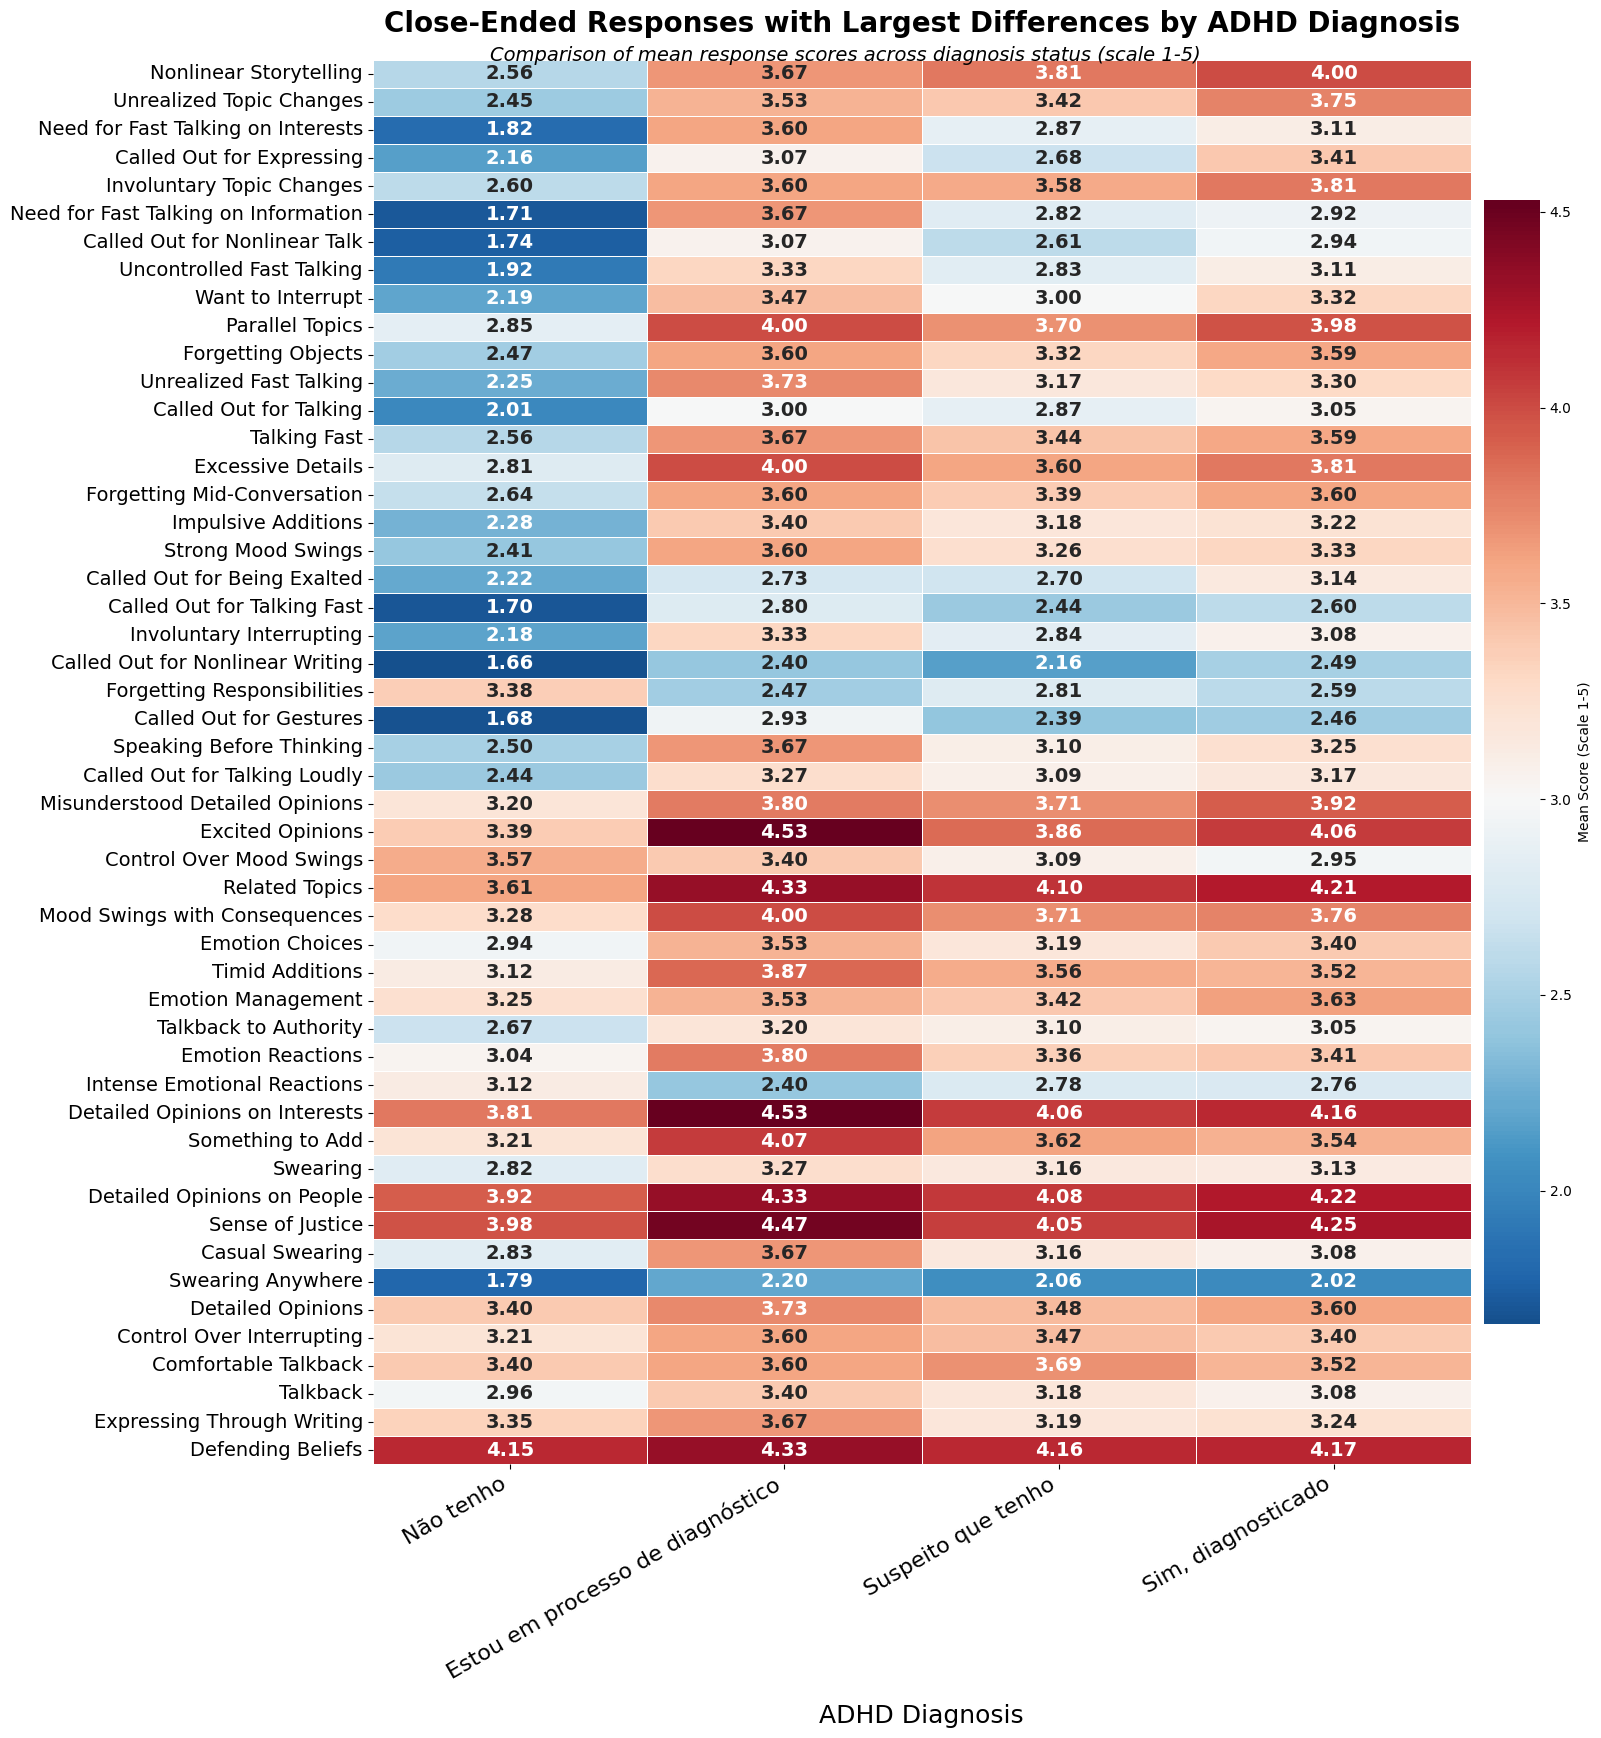

In [17]:
columns_to_ignore = [
    "sex",
    "adhd_diagnosis",
    "age",
    "education",
    "occupation",
    "dialect",
    "special_interest",
    "diary_entry",
    "selfdefining_memory",
    "empty_sheet",
]

df_filtered = df.drop(columns=columns_to_ignore)

# Rename columns in the dataframe for better readability
df_filtered_renamed = df_filtered.rename(columns=feature_map)

df_close_ended = df_filtered_renamed.copy()

# Convert categorical columns to numeric
for col in df_close_ended.columns:
    if df_close_ended[col].dtype.name == 'category':
        df_close_ended[col] = df_close_ended[col].astype(float)

# Calculate the mean of the values for each diagnosis
mean_values = df_close_ended.groupby(df["adhd_diagnosis"]).mean().round(2)

# Define the order for diagnosis categories
diagnosis_order = ["Não tenho", "Estou em processo de diagnóstico", "Suspeito que tenho", "Sim, diagnosticado"]
mean_values = mean_values.reindex(diagnosis_order)

# Transpose and calculate differences between diagnosed and non-ADHD
mean_values_transposed = mean_values.T
diff_column = abs(mean_values_transposed['Sim, diagnosticado'] - mean_values_transposed['Não tenho'])
mean_values_transposed['difference'] = diff_column
mean_values_sorted = mean_values_transposed.sort_values(by='difference', ascending=False)
mean_values_sorted = mean_values_sorted.drop('difference', axis=1)

# Create a cleaner heatmap with better color contrast
plt.figure(figsize=(17, 19))
mask = np.zeros_like(mean_values_sorted)
mask = mean_values_sorted.isna()

# Use a sequential colormap for better interpretation
ax = sns.heatmap(
    mean_values_sorted,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={
        "shrink": 0.8, 
        "label": "Mean Score (Scale 1-5)",
        "pad": 0.01
    },
    center=3,  # Center colormap at midpoint of scale
    annot_kws={"size": 14, "weight": "bold"},
    mask=mask,
)

# Add title and labels with improved styling
plt.title(
    "Close-Ended Responses with Largest Differences by ADHD Diagnosis", 
    fontsize=20, 
    fontweight="bold", 
    pad=20
)
plt.xlabel("ADHD Diagnosis", fontsize=18, labelpad=15)

# Add a subtitle explaining the data
plt.figtext(
    0.5, 0.915, 
    "Comparison of mean response scores across diagnosis status (scale 1-5)",
    ha="center", 
    fontsize=14,
    style="italic"
)

# Format x-axis labels for better readability
plt.xticks(rotation=30, ha="right", fontsize=16)
plt.yticks(fontsize=14)

# Improve spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("data/heatmap_close_ended_sorted.png", dpi=300, bbox_inches="tight")
plt.show()

## Data Dimensionality

### Dataset Structure

/tmp/ipykernel_8067/3897833546.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette="rocket", ax=ax)


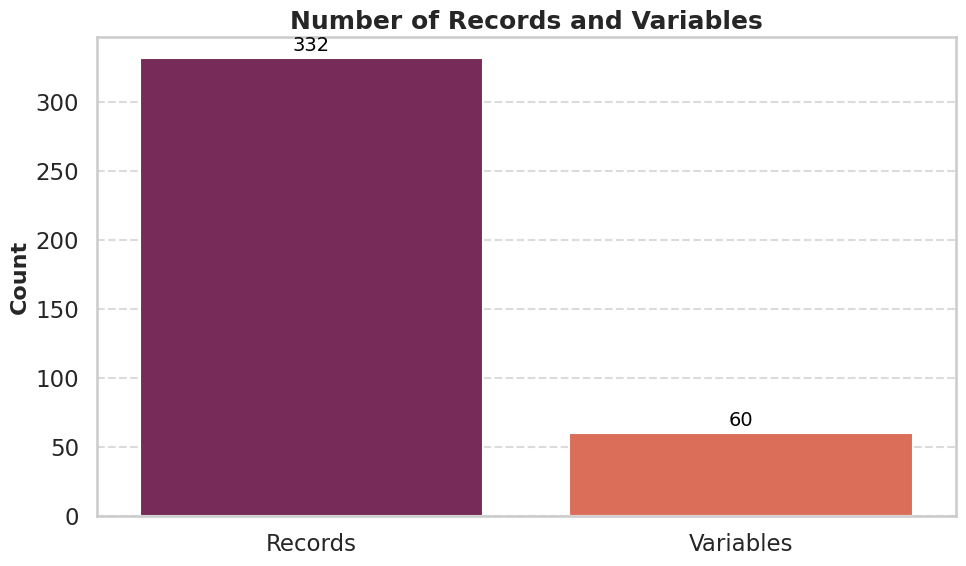

In [18]:
# Set a more visually appealing theme
sns.set_theme(style="whitegrid", context="talk")

# Create the bar plot with improved aesthetics
values = [df.shape[0], df.shape[1]]  # Number of records and variables
categories = ["Records", "Variables"]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=categories, y=values, palette="rocket", ax=ax)

# Add labels and title with improved font sizes and weights
ax.set_ylabel("Count", fontsize=16, fontweight="bold")
ax.set_xlabel("", fontsize=14)
ax.set_title("Number of Records and Variables", fontsize=18, fontweight="bold")

# Annotate the bars with values
for i, value in enumerate(values):
    ax.text(
        i, value + 2, f"{value}", ha="center", va="bottom", fontsize=14, color="black"
    )

# Set the y-axis limit to ensure the bars fit within the plot
ax.set_ylim(0, max(values) + 15)

# Add a grid for better readability
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("data/number_of_records_and_variables.png", dpi=300, bbox_inches="tight")
plt.show()

### Principal Component Analysis

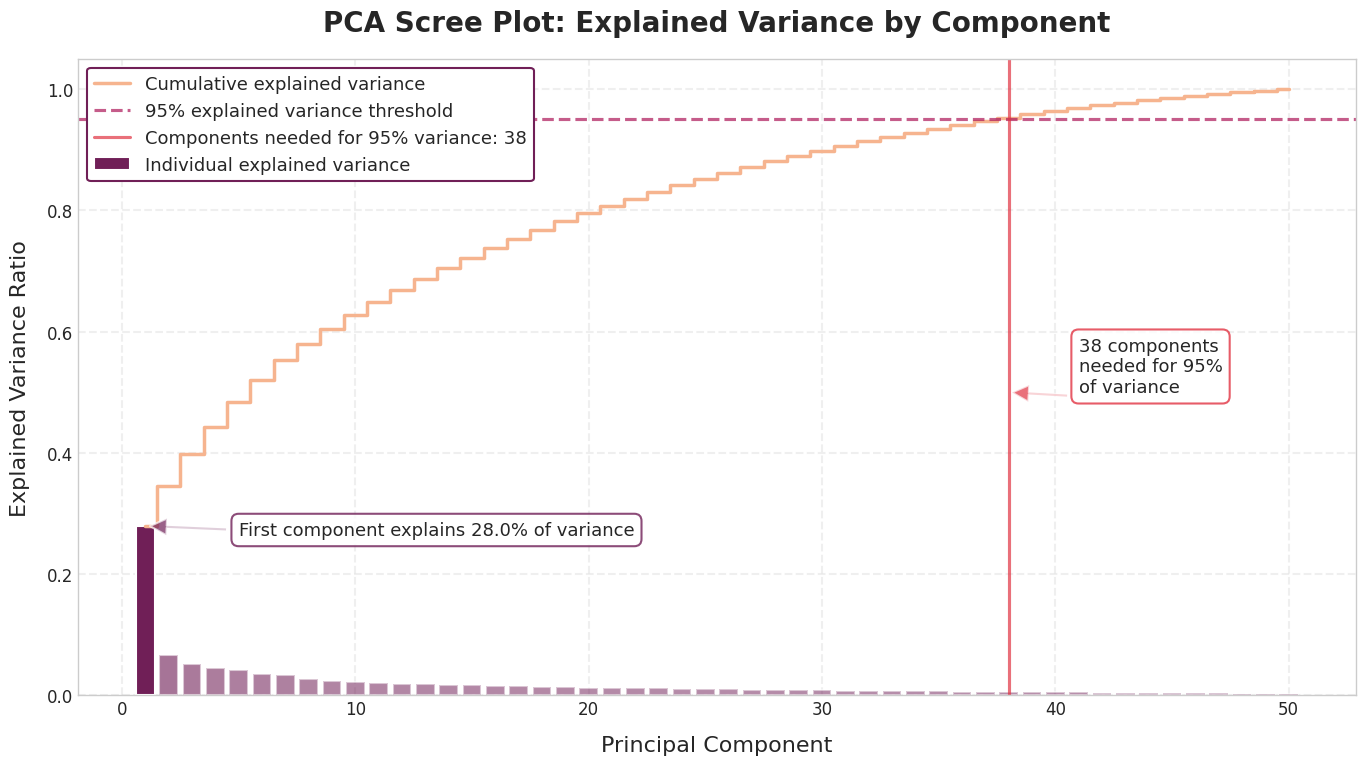

In [19]:
# Filter the dataframe to include only the relevant numerical features
# Excluding demographic and text data
columns_to_ignore = [
    "sex",
    "adhd_diagnosis",
    "age",
    "education",
    "occupation",
    "dialect",
    "special_interest",
    "diary_entry",
    "selfdefining_memory",
    "empty_sheet",
]

# Use only numeric values for PCA
df_for_pca = df.drop(columns=columns_to_ignore).copy()

# Convert categorical columns to numeric if needed
for col in df_for_pca.columns:
    if df_for_pca[col].dtype.name == 'category':
        df_for_pca[col] = df_for_pca[col].astype(float)

# Check for missing values and fill them with the mean for each column
df_for_pca = df_for_pca.fillna(df_for_pca.mean())

# Standardize the data for PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_for_pca)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create an enhanced Scree Plot with more professional look
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')

rocket_colors = sns.color_palette("rocket", 6)

# Plot individual variance explained with more attractive colors
bars = plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    alpha=0.8,
    color=rocket_colors[1],
    label="Individual explained variance"
)

# Add gradient effect to bars
for i, bar in enumerate(bars):
    bar.set_alpha(0.5 + 0.5 * explained_variance_ratio[i]/explained_variance_ratio[0])

# Plot cumulative variance explained with thicker line
plt.step(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    where='mid',
    label="Cumulative explained variance",
    color=rocket_colors[5],
    linewidth=2.5
)

# Add reference line for 95% variance explained
plt.axhline(y=0.95, color=rocket_colors[2], linestyle='--', alpha=0.7, 
           label="95% explained variance threshold")

# Find the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
plt.axvline(x=n_components_95, color=rocket_colors[3], linestyle='-', alpha=0.7, 
           label=f"Components needed for 95% variance: {n_components_95}")

# Add title and labels with improved styling
plt.title("PCA Scree Plot: Explained Variance by Component", 
          fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Principal Component", fontsize=16, labelpad=12)
plt.ylabel("Explained Variance Ratio", fontsize=16, labelpad=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve grid appearance
plt.grid(alpha=0.3, linestyle='--')

# Add annotations with more appealing format
plt.annotate(
    f"First component explains {explained_variance_ratio[0]*100:.1f}% of variance",
    xy=(1, explained_variance_ratio[0]),
    xytext=(5, explained_variance_ratio[0]-0.015),
    fontsize=13,
    arrowprops=dict(facecolor=rocket_colors[1], shrink=0.05, width=1.5, alpha=0.7),
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec=rocket_colors[1], alpha=0.8)
)

# Add annotation for the 95% threshold component
plt.annotate(
    f"{n_components_95} components\nneeded for 95%\nof variance",
    xy=(n_components_95, 0.5),
    xytext=(n_components_95+3, 0.5),
    fontsize=13,
    arrowprops=dict(facecolor=rocket_colors[3], shrink=0.05, width=1.5, alpha=0.7),
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec=rocket_colors[3], alpha=0.8)
)

# Add legend with better styling and positioning
plt.legend(fontsize=13, loc='upper left', framealpha=1, 
           edgecolor=rocket_colors[1], fancybox=True, frameon=True)

# Improve overall appearance
plt.tight_layout()
plt.savefig("data/pca_scree_plot.png", dpi=300, bbox_inches="tight")
plt.show()

## Data Sparsity

In [20]:
# use spacy to get the number of words in each diary entry
word_count_df = df[["special_interest", "diary_entry", "selfdefining_memory", "empty_sheet"]].copy()
import spacy
nlp = spacy.load("pt_core_news_lg")
def count_words(text):
    if pd.isna(text):
        return 0
    doc = nlp(text)
    return len(doc)
word_count_df["special_interest_word_count"] = word_count_df["special_interest"].apply(count_words)
word_count_df["diary_entry_word_count"] = word_count_df["diary_entry"].apply(count_words)
word_count_df["selfdefining_memory_word_count"] = word_count_df["selfdefining_memory"].apply(count_words)
word_count_df["empty_sheet_word_count"] = word_count_df["empty_sheet"].apply(count_words)

### Word Count Distribution

/tmp/ipykernel_8067/886513275.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


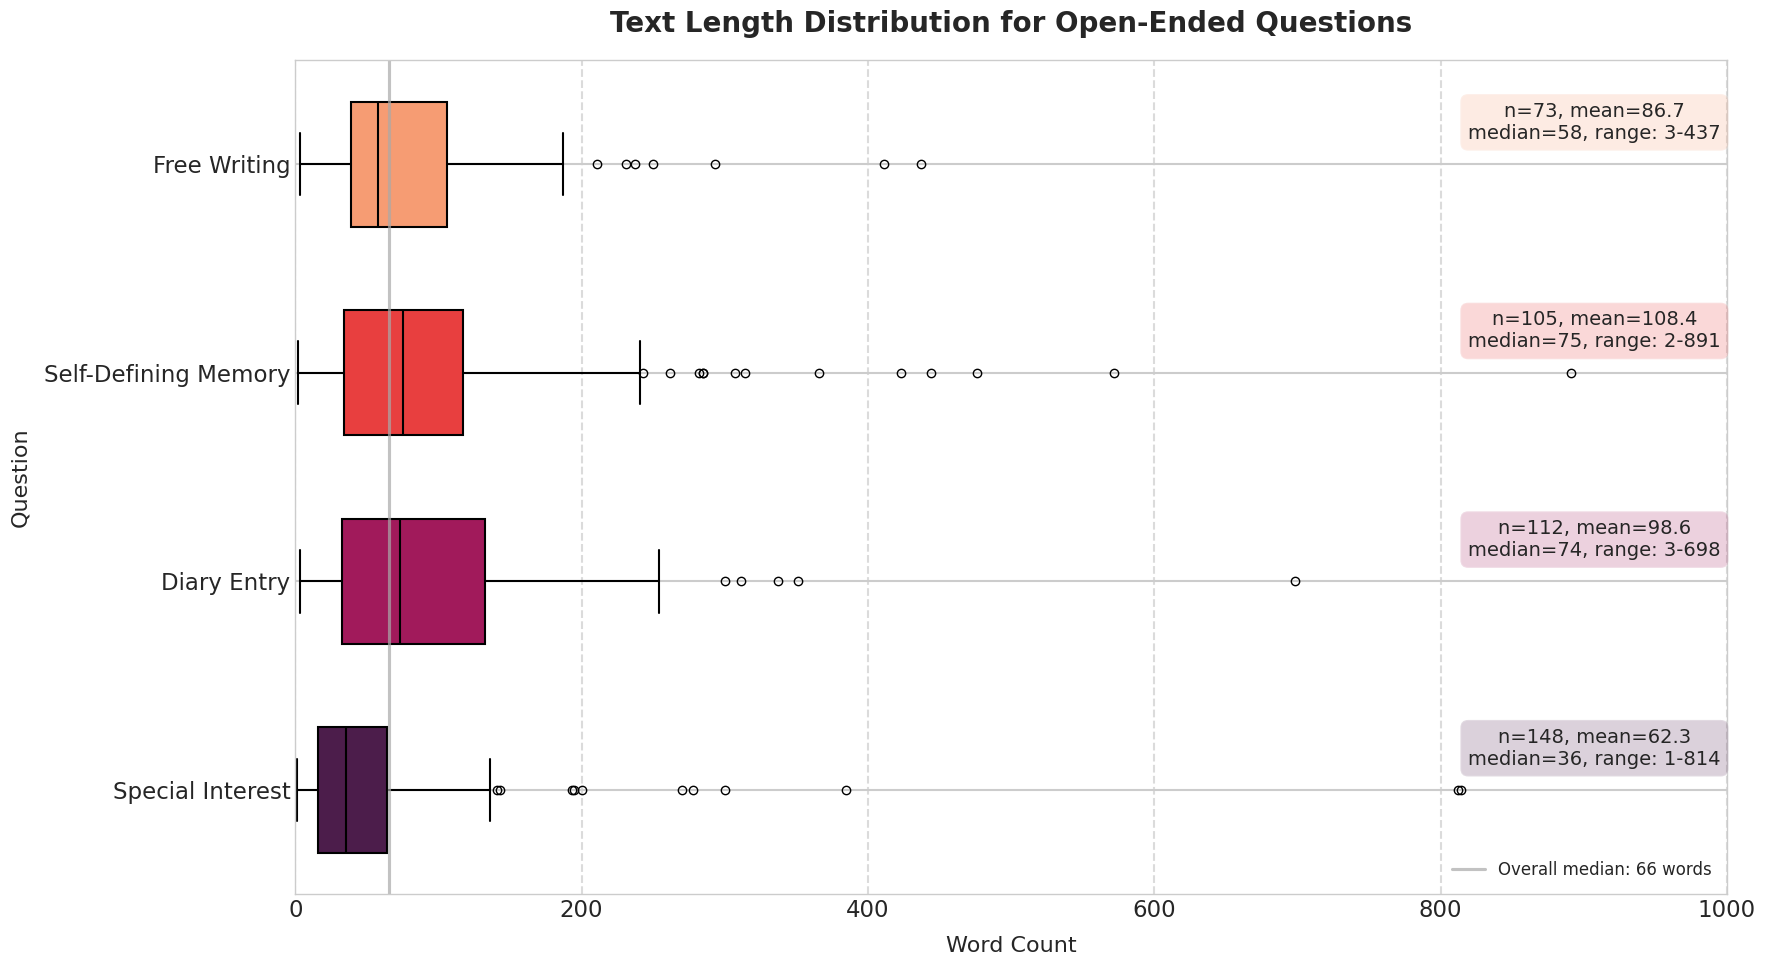

In [21]:
# Create a figure with more appropriate dimensions
fig, ax = plt.subplots(figsize=(18, 10))

# Explicitly define the order of columns to be displayed
question_order = ['special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']
column_order = [col + '_word_count' for col in question_order]

# Get question descriptions in the right order
descriptive_names = [column_descriptive_names[col] for col in question_order]

# Prepare data for the boxplot, filtering out zero values (empty responses)
boxplot_data = []
for col in column_order:
    # Filter out zeros (empty texts)
    filtered_data = word_count_df[word_count_df[col] > 0][col]
    boxplot_data.append(filtered_data)

# Calculate statistics for each text type
stats = {}
for i, (col, name) in enumerate(zip(question_order, descriptive_names)):
    filtered_data = word_count_df[word_count_df[f"{col}_word_count"] > 0][f"{col}_word_count"]
    stats[name] = {
        'count': len(filtered_data),
        'mean': filtered_data.mean(),
        'median': filtered_data.median(),
        'max': filtered_data.max(),
        'min': filtered_data.min()
    }

# Create the horizontal boxplot with filtered data
bp = ax.boxplot(
    boxplot_data,
    vert=False,
    patch_artist=True,
    labels=descriptive_names,
    widths=0.6
)

# Customize boxplot colors using rocket color palette
for i, box in enumerate(bp['boxes']):
    box.set(color='black', linewidth=1.5)
    box.set(facecolor=sns.color_palette("rocket", 4)[i])

for element in ['whiskers', 'caps', 'medians']:
    for item in bp[element]:
        item.set(color='black', linewidth=1.5)

# Add a grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set title and labels with better formatting
ax.set_title("Text Length Distribution for Open-Ended Questions", fontsize=20, fontweight="bold", pad=20)
ax.set_xlabel("Word Count", fontsize=16, labelpad=10)
ax.set_ylabel("Question", fontsize=16, labelpad=10)

# Add annotations with statistics
for i, (name, stat) in enumerate(stats.items()):
    y_pos = i+1
    # Create the annotation text with key statistics
    annotation = f"n={stat['count']}, mean={stat['mean']:.1f}\nmedian={stat['median']:.0f}, range: {stat['min']}-{stat['max']}"
    
    # Position the annotation at the right end of the plot
    ax.annotate(
        annotation,
        xy=(ax.get_xlim()[1] * 0.97, y_pos +0.2),  # Adjusted x position for better visibility
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="center",
        fontsize=14,
        bbox=dict(boxstyle="round,pad=0.4", fc=sns.color_palette("rocket", 4)[i], alpha=0.2)
    )

# Add a horizontal reference line for the median value across all responses
median_val = np.median([stats[name]['median'] for name in descriptive_names])
ax.axvline(median_val, color='darkgray', linestyle='-', alpha=0.7, 
           label=f'Overall median: {median_val:.0f} words')

# Set x-axis limit to 1000
ax.set_xlim(0, 1000)

# Add legend
ax.legend(loc='lower right', fontsize=12)

# Save and display plot
plt.tight_layout()
plt.savefig("data/text_length_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


### Word Count Distribution by ADHD Diagnosis

/tmp/ipykernel_8067/972654527.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


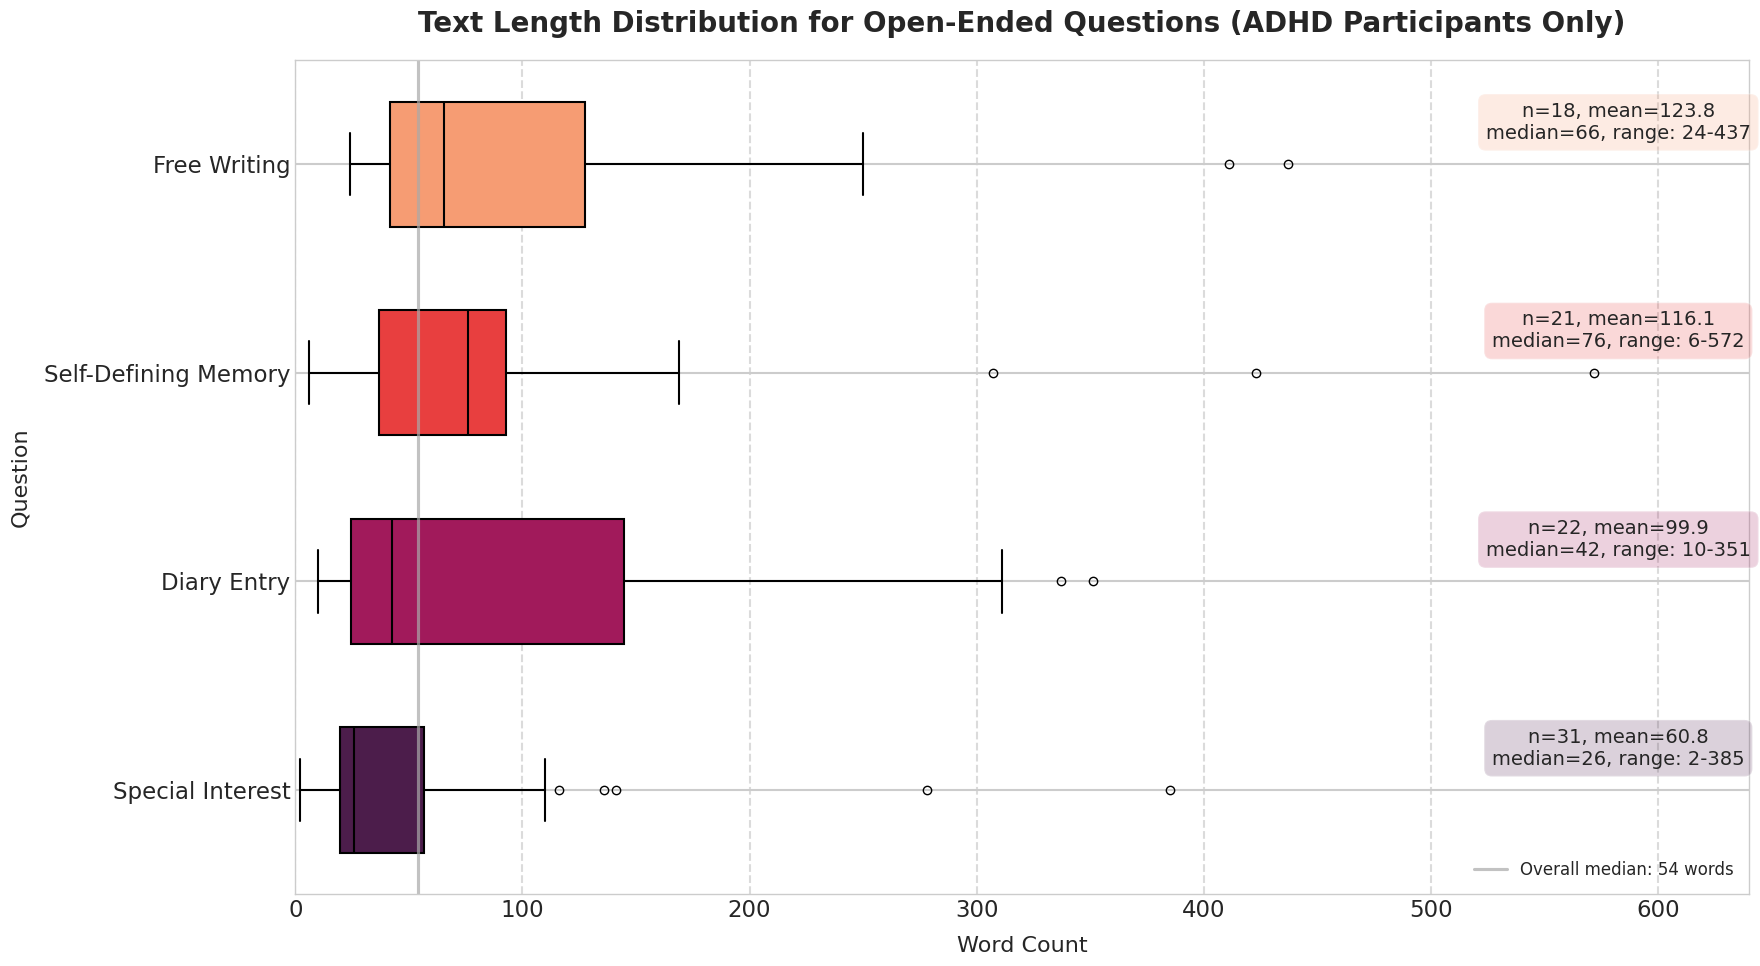

In [22]:
# Create a figure with more appropriate dimensions for ADHD diagnosis only
fig, ax = plt.subplots(figsize=(18, 10))

# Filter data to include only ADHD diagnosed participants
adhd_df = word_count_df[df['adhd_diagnosis'] == 'Sim, diagnosticado']

# Explicitly define the order of columns to be displayed
question_order = ['special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']
column_order = [col + '_word_count' for col in question_order]

# Get question descriptions in the right order
descriptive_names = [column_descriptive_names[col] for col in question_order]

# Prepare data for the boxplot, filtering out zero values (empty responses)
boxplot_data = []
for col in column_order:
    # Filter out zeros (empty texts)
    filtered_data = adhd_df[adhd_df[col] > 0][col]
    boxplot_data.append(filtered_data)

# Calculate statistics for each text type
stats = {}
for i, (col, name) in enumerate(zip(question_order, descriptive_names)):
    filtered_data = adhd_df[adhd_df[f"{col}_word_count"] > 0][f"{col}_word_count"]
    stats[name] = {
        'count': len(filtered_data),
        'mean': filtered_data.mean(),
        'median': filtered_data.median(),
        'max': filtered_data.max(),
        'min': filtered_data.min()
    }

# Create the horizontal boxplot with filtered data
bp = ax.boxplot(
    boxplot_data,
    vert=False,
    patch_artist=True,
    labels=descriptive_names,
    widths=0.6
)

# Customize boxplot colors using rocket color palette
for i, box in enumerate(bp['boxes']):
    box.set(color='black', linewidth=1.5)
    box.set(facecolor=sns.color_palette("rocket", 4)[i])

for element in ['whiskers', 'caps', 'medians']:
    for item in bp[element]:
        item.set(color='black', linewidth=1.5)

# Add a grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set title and labels with better formatting
ax.set_title("Text Length Distribution for Open-Ended Questions (ADHD Participants Only)", fontsize=20, fontweight="bold", pad=20)
ax.set_xlabel("Word Count", fontsize=16, labelpad=10)
ax.set_ylabel("Question", fontsize=16, labelpad=10)

# Add annotations with statistics
for i, (name, stat) in enumerate(stats.items()):
    y_pos = i+1
    # Create the annotation text with key statistics
    annotation = f"n={stat['count']}, mean={stat['mean']:.1f}\nmedian={stat['median']:.0f}, range: {stat['min']}-{stat['max']}"
    
    # Position the annotation at the right end of the plot
    ax.annotate(
        annotation,
        xy=(ax.get_xlim()[1] * 0.97, y_pos +0.2),  # Adjusted x position for better visibility
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="center",
        fontsize=14,
        bbox=dict(boxstyle="round,pad=0.4", fc=sns.color_palette("rocket", 4)[i], alpha=0.2)
    )

# Add a horizontal reference line for the median value across all responses
median_val = np.median([stats[name]['median'] for name in descriptive_names])
ax.axvline(median_val, color='darkgray', linestyle='-', alpha=0.7, 
           label=f'Overall median: {median_val:.0f} words')

# Set x-axis limit to 1000
ax.set_xlim(0, 640)

# Add legend
ax.legend(loc='lower right', fontsize=12)

# Save and display plot
plt.tight_layout()
plt.savefig("data/text_length_distribution_adhd_only.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_8067/1136488162.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


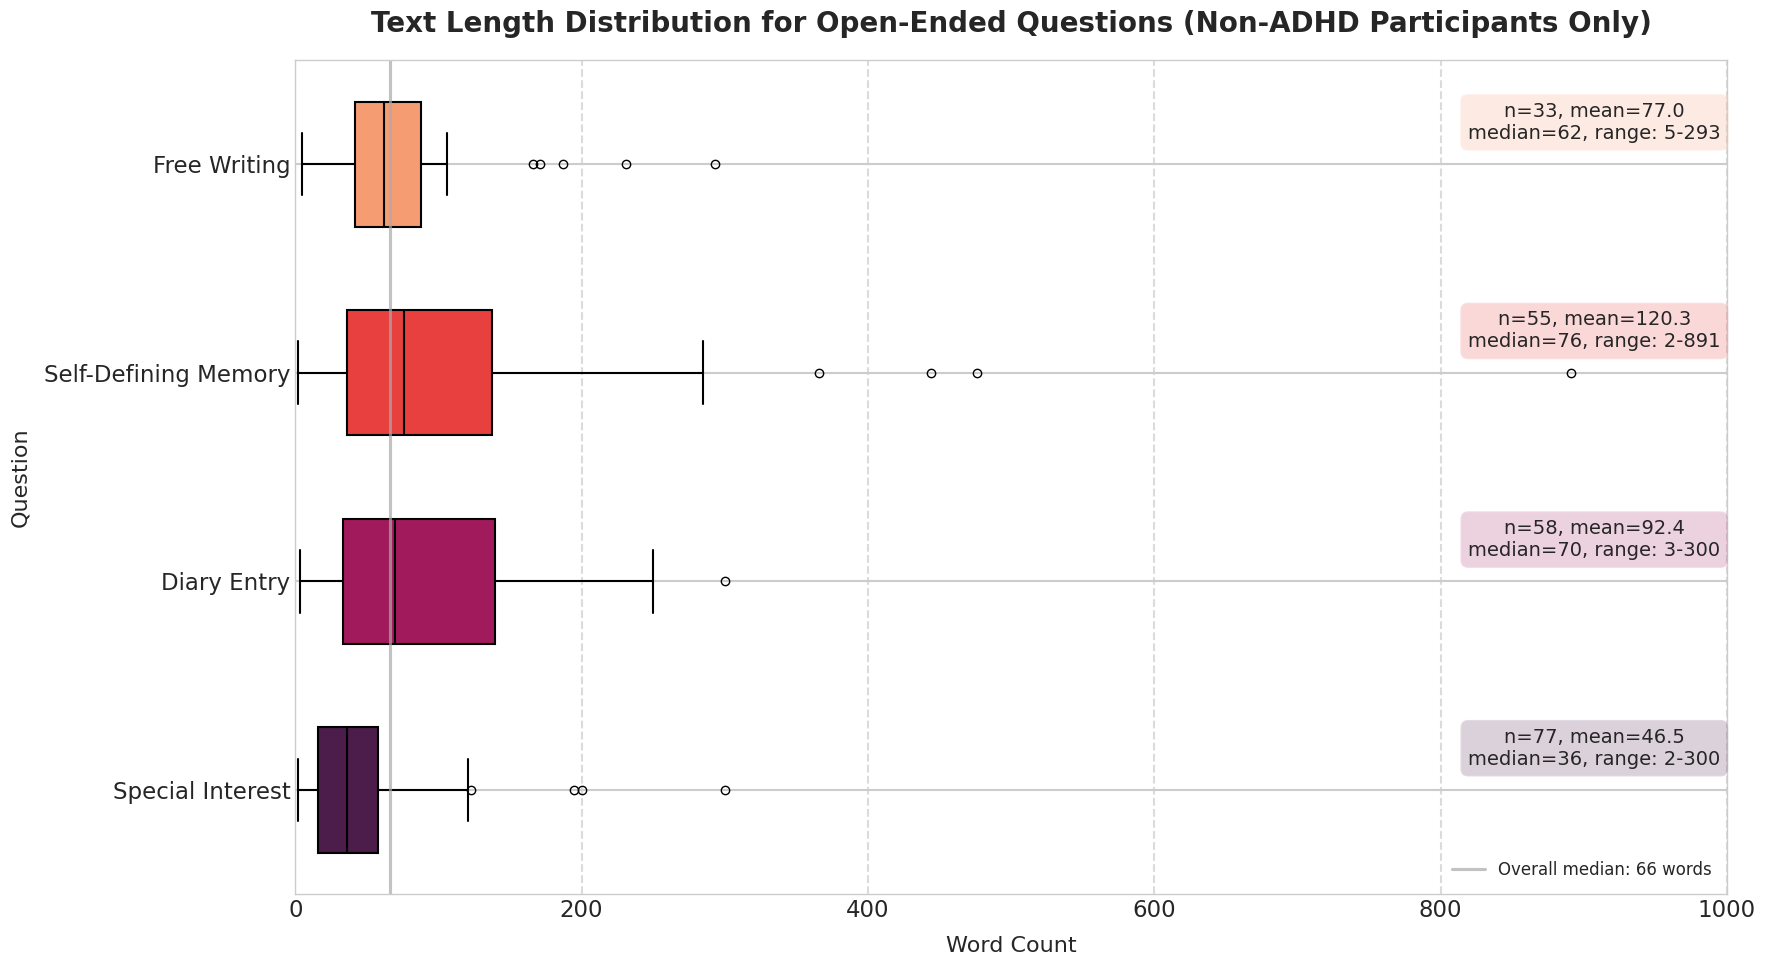

In [23]:
# Create a figure with more appropriate dimensions for ADHD diagnosis only
fig, ax = plt.subplots(figsize=(18, 10))

# Filter data to include only ADHD diagnosed participants
adhd_df = word_count_df[df['adhd_diagnosis'] == 'Não tenho']

# Explicitly define the order of columns to be displayed
question_order = ['special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']
column_order = [col + '_word_count' for col in question_order]

# Get question descriptions in the right order
descriptive_names = [column_descriptive_names[col] for col in question_order]

# Prepare data for the boxplot, filtering out zero values (empty responses)
boxplot_data = []
for col in column_order:
    # Filter out zeros (empty texts)
    filtered_data = adhd_df[adhd_df[col] > 0][col]
    boxplot_data.append(filtered_data)

# Calculate statistics for each text type
stats = {}
for i, (col, name) in enumerate(zip(question_order, descriptive_names)):
    filtered_data = adhd_df[adhd_df[f"{col}_word_count"] > 0][f"{col}_word_count"]
    stats[name] = {
        'count': len(filtered_data),
        'mean': filtered_data.mean(),
        'median': filtered_data.median(),
        'max': filtered_data.max(),
        'min': filtered_data.min()
    }

# Create the horizontal boxplot with filtered data
bp = ax.boxplot(
    boxplot_data,
    vert=False,
    patch_artist=True,
    labels=descriptive_names,
    widths=0.6
)

# Customize boxplot colors using rocket color palette
for i, box in enumerate(bp['boxes']):
    box.set(color='black', linewidth=1.5)
    box.set(facecolor=sns.color_palette("rocket", 4)[i])

for element in ['whiskers', 'caps', 'medians']:
    for item in bp[element]:
        item.set(color='black', linewidth=1.5)

# Add a grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set title and labels with better formatting
ax.set_title("Text Length Distribution for Open-Ended Questions (Non-ADHD Participants Only)", fontsize=20, fontweight="bold", pad=20)
ax.set_xlabel("Word Count", fontsize=16, labelpad=10)
ax.set_ylabel("Question", fontsize=16, labelpad=10)

# Add annotations with statistics
for i, (name, stat) in enumerate(stats.items()):
    y_pos = i+1
    # Create the annotation text with key statistics
    annotation = f"n={stat['count']}, mean={stat['mean']:.1f}\nmedian={stat['median']:.0f}, range: {stat['min']}-{stat['max']}"
    
    # Position the annotation at the right end of the plot
    ax.annotate(
        annotation,
        xy=(ax.get_xlim()[1] * 0.97, y_pos +0.2),  # Adjusted x position for better visibility
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="center",
        fontsize=14,
        bbox=dict(boxstyle="round,pad=0.4", fc=sns.color_palette("rocket", 4)[i], alpha=0.2)
    )

# Add a horizontal reference line for the median value across all responses
median_val = np.median([stats[name]['median'] for name in descriptive_names])
ax.axvline(median_val, color='darkgray', linestyle='-', alpha=0.7, 
           label=f'Overall median: {median_val:.0f} words')

# Set x-axis limit to 1000
ax.set_xlim(0, 1000)

# Add legend
ax.legend(loc='lower right', fontsize=12)

# Save and display plot
plt.tight_layout()
plt.savefig("data/text_length_distribution_non_adhd_only.png", dpi=300, bbox_inches="tight")
plt.show()


### Word Count Distribution by Sex

/tmp/ipykernel_8067/1976480723.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


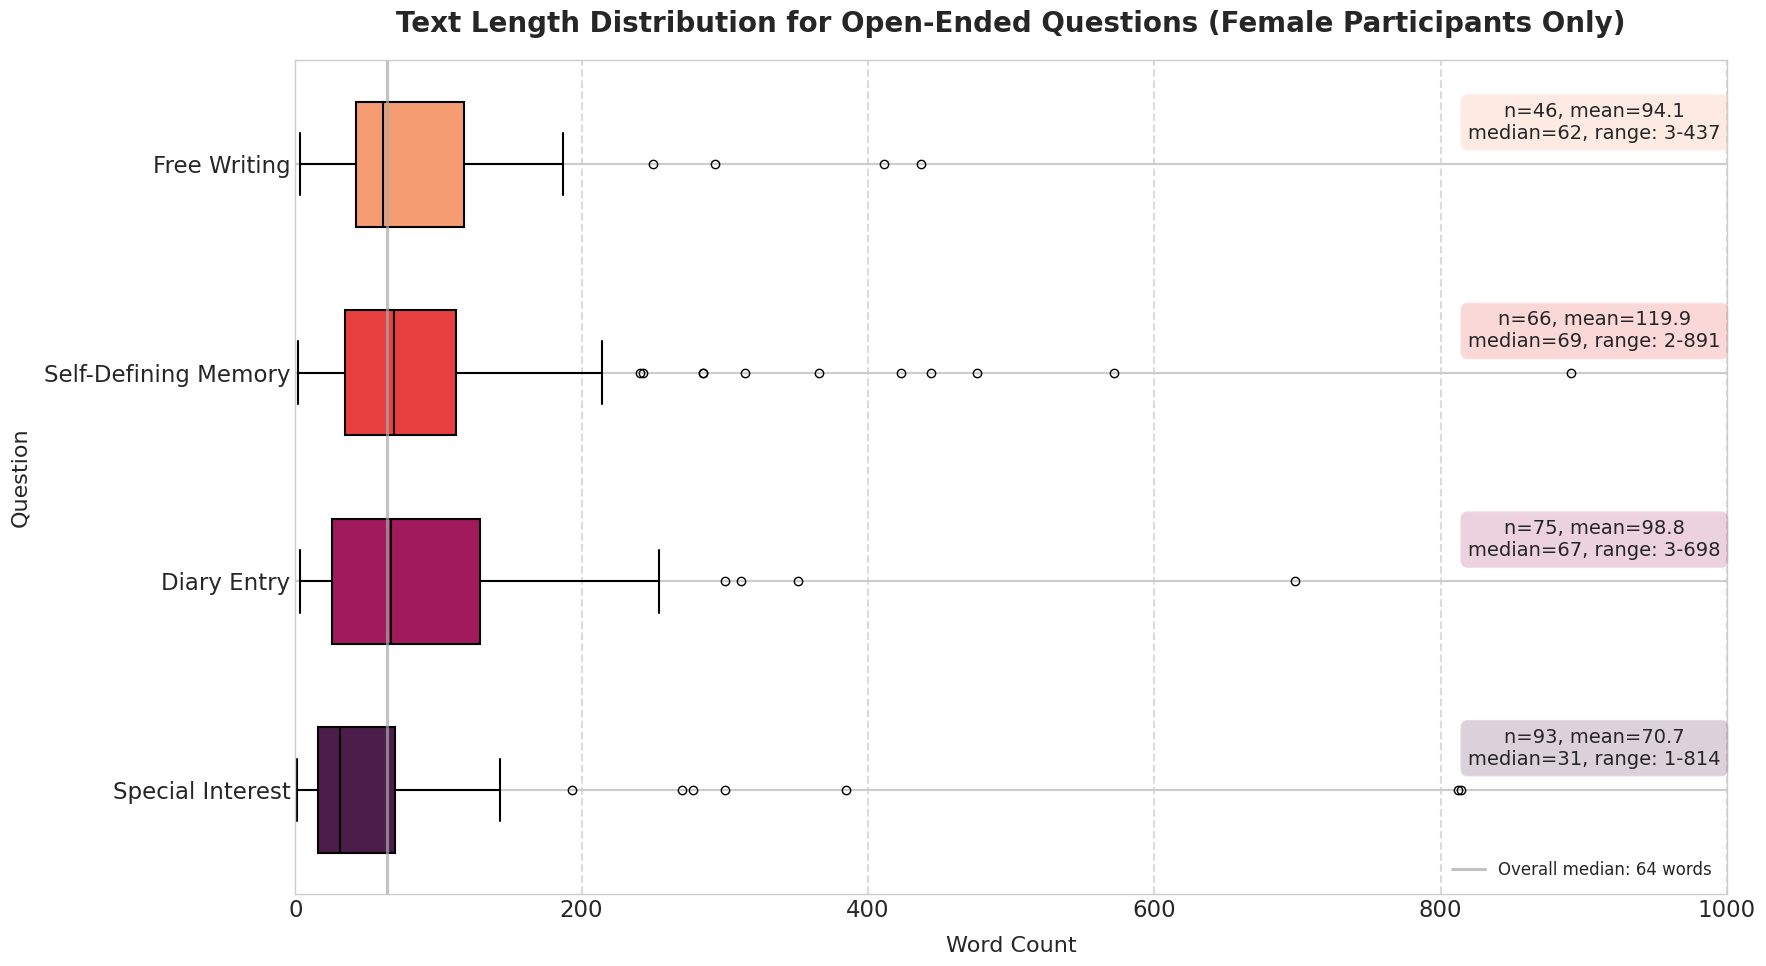

In [24]:
# Create a figure with more appropriate dimensions for ADHD diagnosis only
fig, ax = plt.subplots(figsize=(18, 10))

# Filter data to include only ADHD diagnosed participants
adhd_df = word_count_df[df['sex'] == 'Feminino']

# Explicitly define the order of columns to be displayed
question_order = ['special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']
column_order = [col + '_word_count' for col in question_order]

# Get question descriptions in the right order
descriptive_names = [column_descriptive_names[col] for col in question_order]

# Prepare data for the boxplot, filtering out zero values (empty responses)
boxplot_data = []
for col in column_order:
    # Filter out zeros (empty texts)
    filtered_data = adhd_df[adhd_df[col] > 0][col]
    boxplot_data.append(filtered_data)

# Calculate statistics for each text type
stats = {}
for i, (col, name) in enumerate(zip(question_order, descriptive_names)):
    filtered_data = adhd_df[adhd_df[f"{col}_word_count"] > 0][f"{col}_word_count"]
    stats[name] = {
        'count': len(filtered_data),
        'mean': filtered_data.mean(),
        'median': filtered_data.median(),
        'max': filtered_data.max(),
        'min': filtered_data.min()
    }

# Create the horizontal boxplot with filtered data
bp = ax.boxplot(
    boxplot_data,
    vert=False,
    patch_artist=True,
    labels=descriptive_names,
    widths=0.6
)

# Customize boxplot colors using rocket color palette
for i, box in enumerate(bp['boxes']):
    box.set(color='black', linewidth=1.5)
    box.set(facecolor=sns.color_palette("rocket", 4)[i])

for element in ['whiskers', 'caps', 'medians']:
    for item in bp[element]:
        item.set(color='black', linewidth=1.5)

# Add a grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set title and labels with better formatting
ax.set_title("Text Length Distribution for Open-Ended Questions (Female Participants Only)", fontsize=20, fontweight="bold", pad=20)
ax.set_xlabel("Word Count", fontsize=16, labelpad=10)
ax.set_ylabel("Question", fontsize=16, labelpad=10)

# Add annotations with statistics
for i, (name, stat) in enumerate(stats.items()):
    y_pos = i+1
    # Create the annotation text with key statistics
    annotation = f"n={stat['count']}, mean={stat['mean']:.1f}\nmedian={stat['median']:.0f}, range: {stat['min']}-{stat['max']}"
    
    # Position the annotation at the right end of the plot
    ax.annotate(
        annotation,
        xy=(ax.get_xlim()[1] * 0.97, y_pos +0.2),  # Adjusted x position for better visibility
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="center",
        fontsize=14,
        bbox=dict(boxstyle="round,pad=0.4", fc=sns.color_palette("rocket", 4)[i], alpha=0.2)
    )

# Add a horizontal reference line for the median value across all responses
median_val = np.median([stats[name]['median'] for name in descriptive_names])
ax.axvline(median_val, color='darkgray', linestyle='-', alpha=0.7, 
           label=f'Overall median: {median_val:.0f} words')

# Set x-axis limit to 1000
ax.set_xlim(0, 1000)

# Add legend
ax.legend(loc='lower right', fontsize=12)

# Save and display plot
plt.tight_layout()
plt.savefig("data/text_length_distribution_female_only.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_8067/2157932436.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


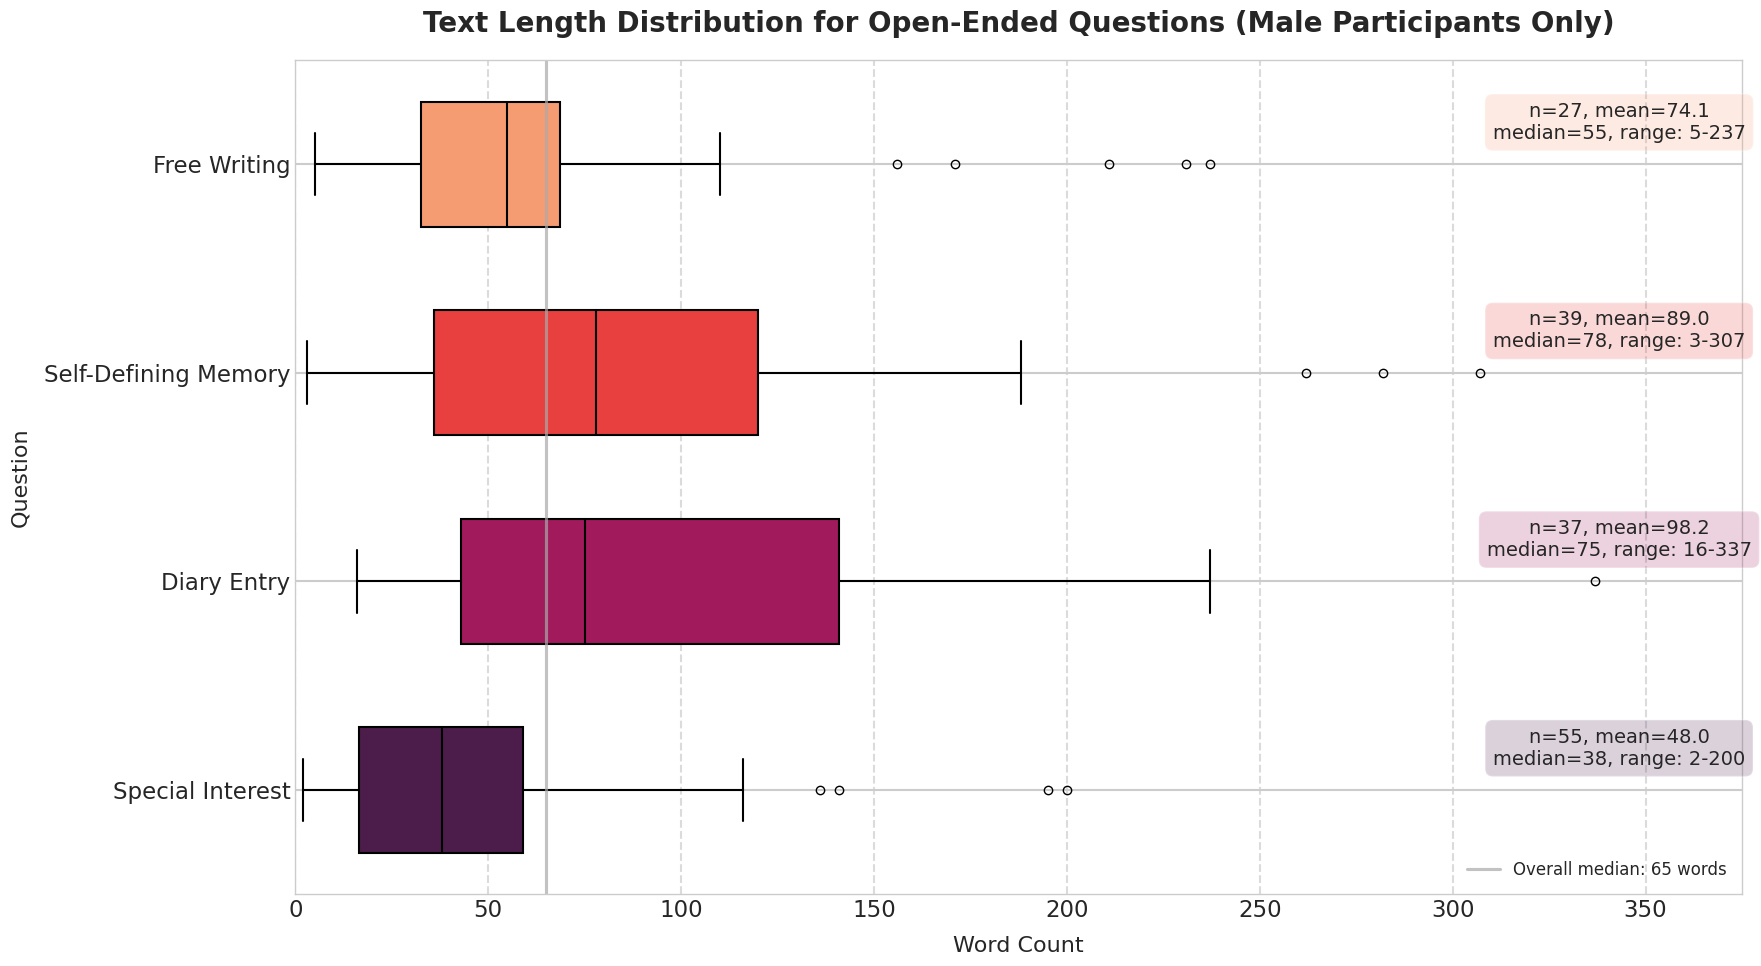

In [25]:
# Create a figure with more appropriate dimensions for ADHD diagnosis only
fig, ax = plt.subplots(figsize=(18, 10))

# Filter data to include only ADHD diagnosed participants
adhd_df = word_count_df[df['sex'] == 'Masculino']

# Explicitly define the order of columns to be displayed
question_order = ['special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']
column_order = [col + '_word_count' for col in question_order]

# Get question descriptions in the right order
descriptive_names = [column_descriptive_names[col] for col in question_order]

# Prepare data for the boxplot, filtering out zero values (empty responses)
boxplot_data = []
for col in column_order:
    # Filter out zeros (empty texts)
    filtered_data = adhd_df[adhd_df[col] > 0][col]
    boxplot_data.append(filtered_data)

# Calculate statistics for each text type
stats = {}
for i, (col, name) in enumerate(zip(question_order, descriptive_names)):
    filtered_data = adhd_df[adhd_df[f"{col}_word_count"] > 0][f"{col}_word_count"]
    stats[name] = {
        'count': len(filtered_data),
        'mean': filtered_data.mean(),
        'median': filtered_data.median(),
        'max': filtered_data.max(),
        'min': filtered_data.min()
    }

# Create the horizontal boxplot with filtered data
bp = ax.boxplot(
    boxplot_data,
    vert=False,
    patch_artist=True,
    labels=descriptive_names,
    widths=0.6
)

# Customize boxplot colors using rocket color palette
for i, box in enumerate(bp['boxes']):
    box.set(color='black', linewidth=1.5)
    box.set(facecolor=sns.color_palette("rocket", 4)[i])

for element in ['whiskers', 'caps', 'medians']:
    for item in bp[element]:
        item.set(color='black', linewidth=1.5)

# Add a grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set title and labels with better formatting
ax.set_title("Text Length Distribution for Open-Ended Questions (Male Participants Only)", fontsize=20, fontweight="bold", pad=20)
ax.set_xlabel("Word Count", fontsize=16, labelpad=10)
ax.set_ylabel("Question", fontsize=16, labelpad=10)

# Add annotations with statistics
for i, (name, stat) in enumerate(stats.items()):
    y_pos = i+1
    # Create the annotation text with key statistics
    annotation = f"n={stat['count']}, mean={stat['mean']:.1f}\nmedian={stat['median']:.0f}, range: {stat['min']}-{stat['max']}"
    
    # Position the annotation at the right end of the plot
    ax.annotate(
        annotation,
        xy=(ax.get_xlim()[1] * 0.97, y_pos +0.2),  # Adjusted x position for better visibility
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="center",
        fontsize=14,
        bbox=dict(boxstyle="round,pad=0.4", fc=sns.color_palette("rocket", 4)[i], alpha=0.2)
    )

# Add a horizontal reference line for the median value across all responses
median_val = np.median([stats[name]['median'] for name in descriptive_names])
ax.axvline(median_val, color='darkgray', linestyle='-', alpha=0.7, 
           label=f'Overall median: {median_val:.0f} words')

# Set x-axis limit to 1000
ax.set_xlim(0, 375)

# Add legend
ax.legend(loc='lower right', fontsize=12)

# Save and display plot
plt.tight_layout()
plt.savefig("data/text_length_distribution_male_only.png", dpi=300, bbox_inches="tight")
plt.show()


### Most Significant Terms

📊 TF-IDF Analysis Summary:
➡️ Number of entries with text: 160 out of 332 (48.2%)
➡️ TF-IDF matrix shape: 160×1314
➡️ Vocabulary size: 1314
➡️ Sparsity: 95.18% (mostly empty)


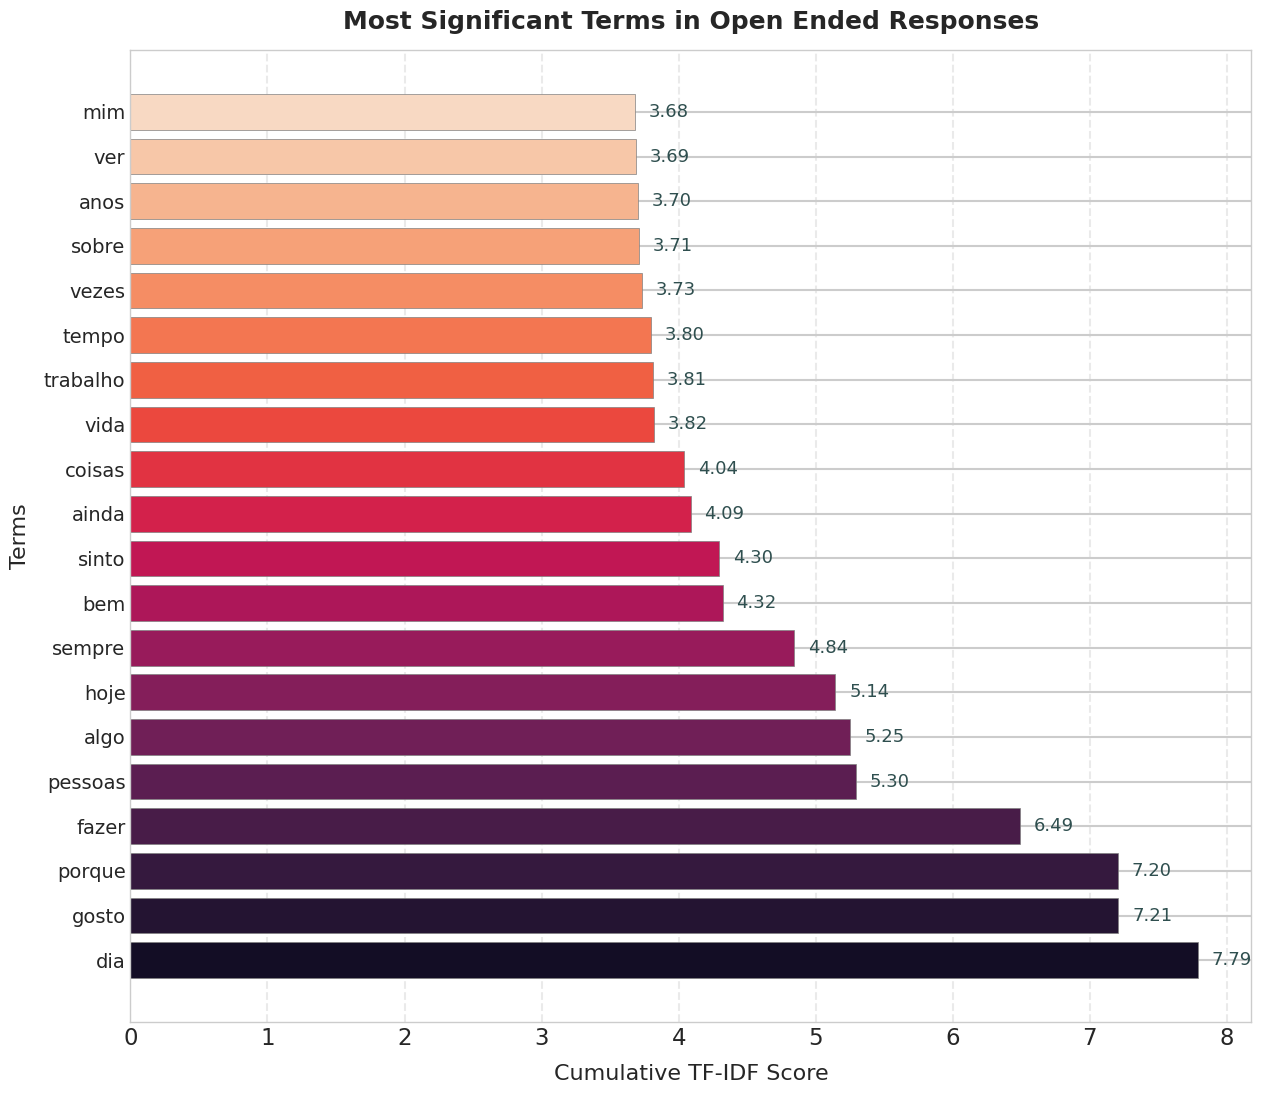

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import vstack
import nltk
from nltk.corpus import stopwords

# Download Portuguese stopwords (only once)
nltk.download('stopwords', quiet=True)

# Load Portuguese stopwords
portuguese_stopwords = stopwords.words('portuguese')
additional_stopwords = ['pra', 'pro', 'tá', 'já', 'ter', 'vai', 'vou', 'então', 'assim', 'aí']
portuguese_stopwords.extend(additional_stopwords)

# Filter to include only entries with text content
mask = (word_count_df['special_interest_word_count'] > 0) | \
    (word_count_df['diary_entry_word_count'] > 0) | \
    (word_count_df['selfdefining_memory_word_count'] > 0) | \
    (word_count_df['empty_sheet_word_count'] > 0)
    
filtered_df = df[mask].copy()

# Fill empty entries with empty strings for TF-IDF processing
text_columns = ['special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']
text_data = filtered_df[text_columns].fillna('')
filtered_df['combined_text'] = text_data.agg(' '.join, axis=1)

# Create a more robust TF-IDF vectorizer with parameters tuned for Portuguese text
vectorizer = TfidfVectorizer(
    max_df=0.8,        # Ignore terms that appear in more than 80% of documents
    min_df=3,          # Ignore terms that appear in fewer than 3 documents
    stop_words=portuguese_stopwords,  
    ngram_range=(1, 3), # Consider both unigrams and bigrams
    max_features=2000   # Limit vocabulary size
)

# Create the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(filtered_df['combined_text'])

# Calculate sparsity metrics
total_elements = tfidf_matrix.shape[0] * tfidf_matrix.shape[1]
nonzero_elements = tfidf_matrix.count_nonzero()
sparsity = 100 * (1 - (nonzero_elements / total_elements))

# Print summary statistics with better formatting
print(f"📊 TF-IDF Analysis Summary:")
print(f"➡️ Number of entries with text: {filtered_df.shape[0]} out of {df.shape[0]} ({filtered_df.shape[0]/df.shape[0]*100:.1f}%)")
print(f"➡️ TF-IDF matrix shape: {tfidf_matrix.shape[0]}×{tfidf_matrix.shape[1]}")
print(f"➡️ Vocabulary size: {len(vectorizer.get_feature_names_out())}")
print(f"➡️ Sparsity: {sparsity:.2f}% (mostly empty)")

# Get the most important terms (highest TF-IDF scores)
feature_names = vectorizer.get_feature_names_out()
# Sum TF-IDF scores for each term across all documents
tfidf_sum = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
# Get indices of top terms
top_n = 20  # Show top 20 terms
top_indices = tfidf_sum.argsort()[-top_n:][::-1]
top_terms = [feature_names[i] for i in top_indices]
top_scores = tfidf_sum[top_indices]

# Create a horizontal bar chart of top terms with improved styling
plt.figure(figsize=(13, 12))

# Create bars with gradient color
colors = sns.color_palette("rocket", len(top_terms))
bars = plt.barh(
    range(len(top_terms)),
    top_scores, 
    color=colors,
    edgecolor='gray',
    linewidth=0.5
)

# Add term labels with custom formatting
plt.yticks(range(len(top_terms)), top_terms, fontsize=14)

# Add score values next to the bars
for i, (term, score) in enumerate(zip(top_terms, top_scores)):
    plt.text(
     score + 0.1, 
     i,
     f"{score:.2f}", 
     va='center',
     fontsize=13,
     color='darkslategray'
    )

# Add labels and title with improved styling
plt.xlabel("Cumulative TF-IDF Score", fontsize=16, labelpad=10)
plt.ylabel("Terms", fontsize=16, labelpad=10)
plt.title("Most Significant Terms in Open Ended Responses", fontsize=18, fontweight="bold", pad=15)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Separate by source type (optional)
if False:  # Set to True to include breakdown by source type
    # Create separate TF-IDF matrices for each text type
    source_scores = {}
    for col in text_columns:
     # Only use non-empty entries for this column
     col_data = filtered_df[filtered_df[col].notna()][col].tolist()
     if col_data:
         col_vectorizer = TfidfVectorizer(vocabulary=vectorizer.vocabulary_)
         col_matrix = col_vectorizer.fit_transform(col_data)
         col_sum = np.asarray(col_matrix.sum(axis=0)).flatten()
         source_scores[column_descriptive_names[col]] = {feature_names[i]: col_sum[i] for i in top_indices}

# Improve layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig("data/top_terms_tfidf.png", dpi=300, bbox_inches="tight")
plt.show()


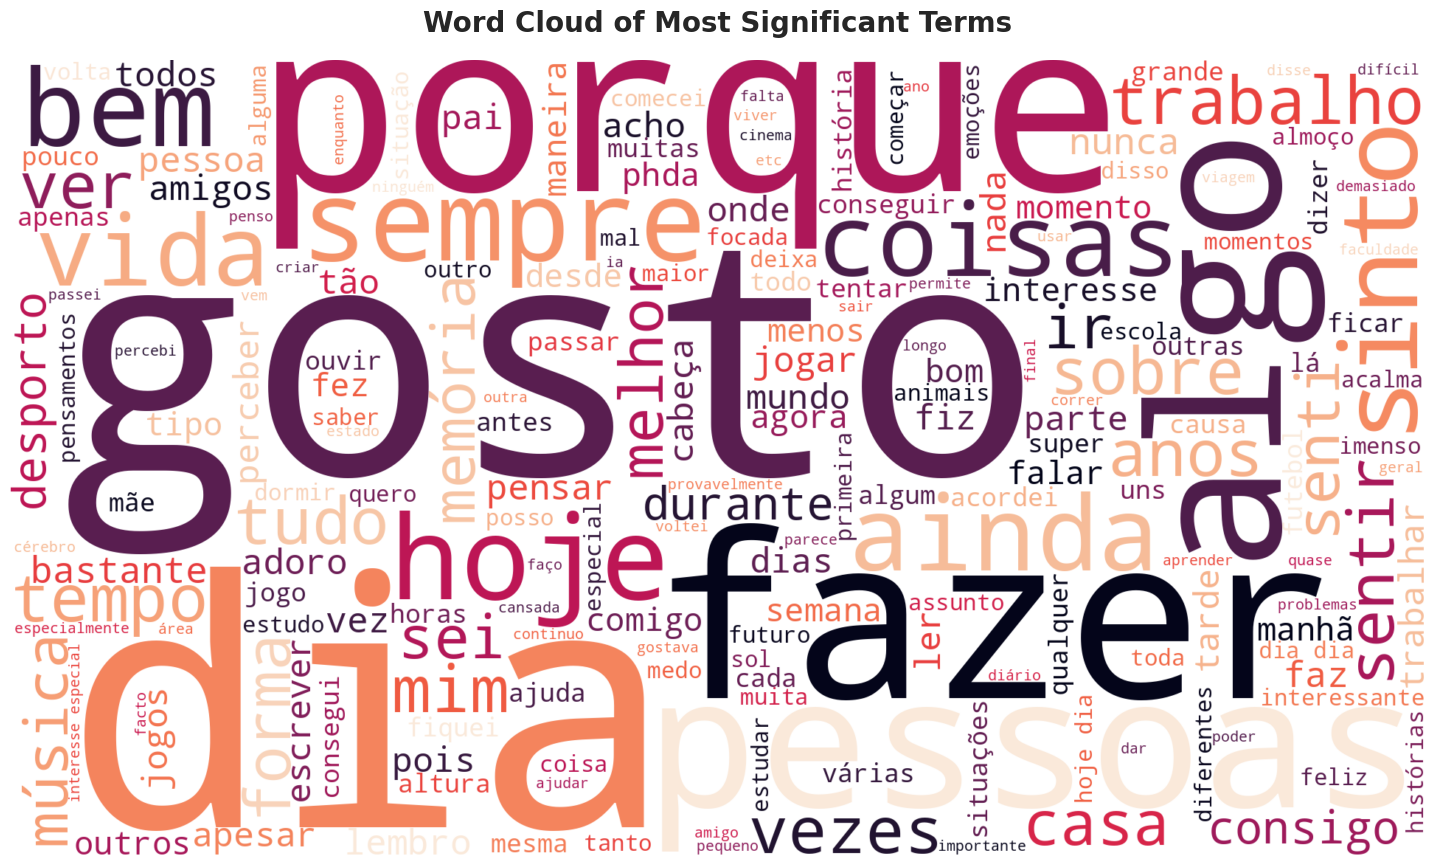

In [27]:
from wordcloud import WordCloud
    
# Get top 200 terms and their scores
top200_indices = tfidf_sum.argsort()[-200:][::-1]
word_freq = {feature_names[i]: tfidf_sum[i] for i in top200_indices}

# Generate and display the word cloud
plt.figure(figsize=(16, 9))
wc = WordCloud(
    width=1920, 
    height=1080, 
    background_color="white", 
    colormap="rocket",
    max_words=200,
    contour_width=1,
    contour_color='steelblue'
).generate_from_frequencies(word_freq)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Significant Terms", fontsize=20, fontweight="bold", pad=20)
plt.tight_layout()
plt.savefig("data/tfidf_wordcloud.png", dpi=300, bbox_inches="tight")
plt.show()

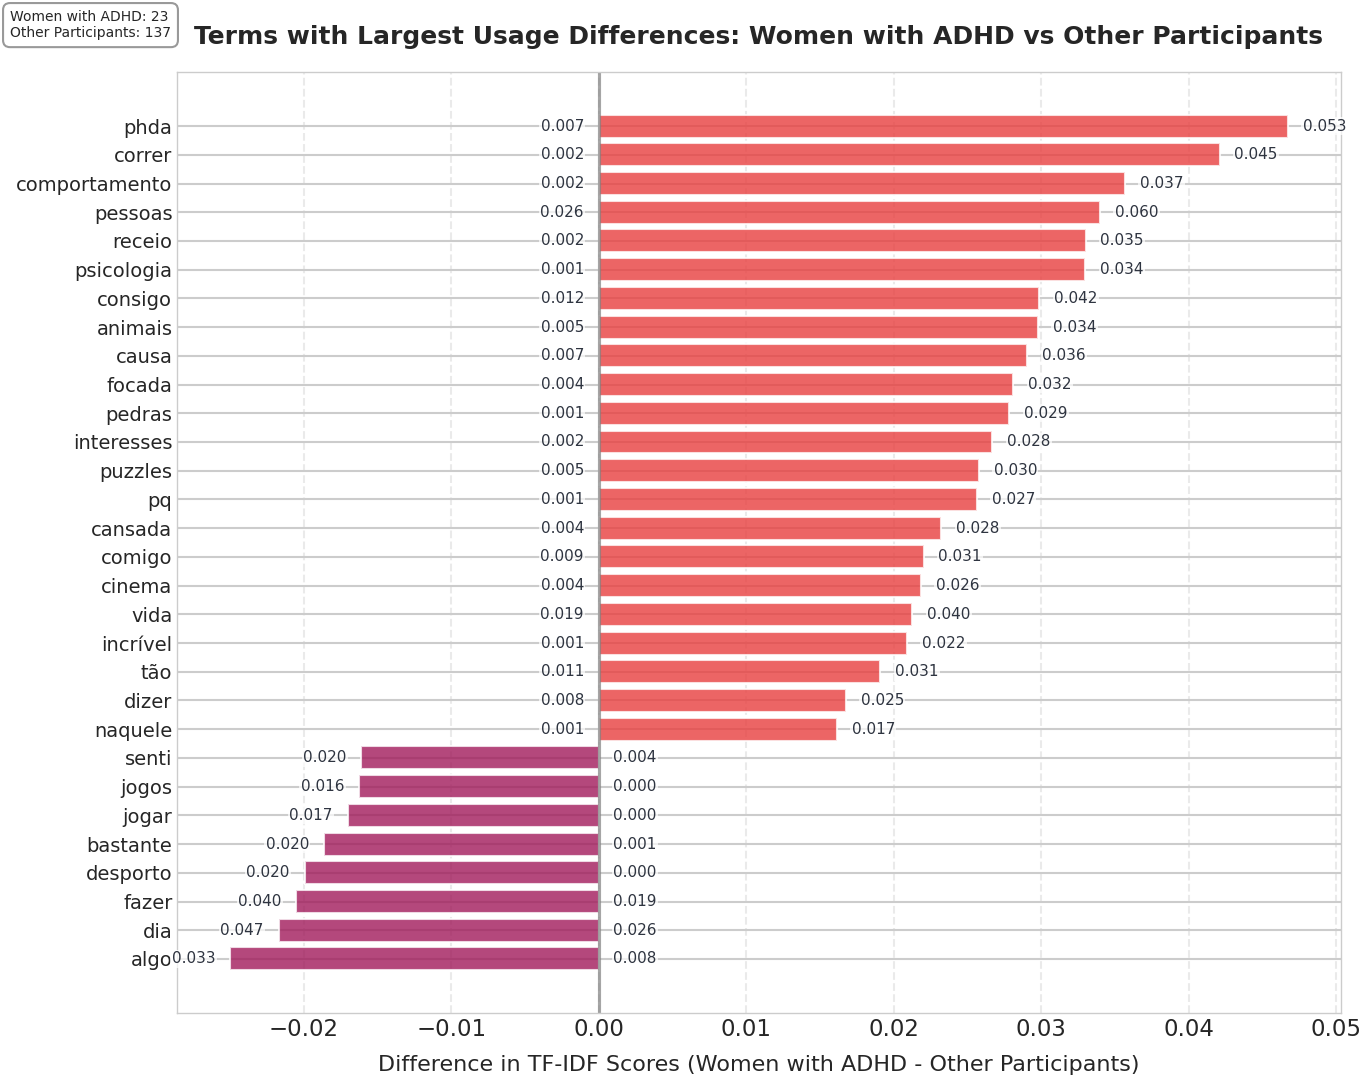

In [28]:
# Create separate TF-IDF matrices for women with ADHD vs everyone else
women_adhd_indices = df[(df['adhd_diagnosis'] == 'Sim, diagnosticado') & (df['sex'] == 'Feminino')].index
women_adhd_indices = [i for i in women_adhd_indices if i in filtered_df.index]
others_indices = df.index.difference(women_adhd_indices)
others_indices = [i for i in others_indices if i in filtered_df.index]

# Calculate term frequency differences between groups
if len(women_adhd_indices) > 0 and len(others_indices) > 0:
    women_adhd_texts = filtered_df.loc[women_adhd_indices, 'combined_text']
    others_texts = filtered_df.loc[others_indices, 'combined_text']
    
    # Create new vectorizer to ensure consistent vocabulary
    comparison_vectorizer = TfidfVectorizer(
        max_df=0.8,
        min_df=2,
        stop_words=portuguese_stopwords,
        ngram_range=(1, 2),
        max_features=2000
    )
    
    # Fit on all texts to get a common vocabulary
    comparison_vectorizer.fit(filtered_df['combined_text'])
    
    # Transform each group separately
    women_adhd_tfidf = comparison_vectorizer.transform(women_adhd_texts)
    others_tfidf = comparison_vectorizer.transform(others_texts)
    
    # Calculate average TF-IDF scores for each term in each group
    women_adhd_avg = np.asarray(women_adhd_tfidf.mean(axis=0)).flatten()
    others_avg = np.asarray(others_tfidf.mean(axis=0)).flatten()
    
    # Calculate difference in average scores
    diff_scores = women_adhd_avg - others_avg
    abs_diff_scores = np.abs(diff_scores)
    
    # Get the terms with the biggest absolute differences
    feature_names = comparison_vectorizer.get_feature_names_out()
    sorted_indices = np.argsort(abs_diff_scores)[-30:]  # Get top 20 terms with biggest differences
    
    # Sort them by actual difference (not absolute) to see which group uses which terms more
    sorted_indices = sorted_indices[np.argsort(diff_scores[sorted_indices])]
    
    diff_terms = [feature_names[i] for i in sorted_indices]
    women_adhd_scores = women_adhd_avg[sorted_indices]
    others_scores = others_avg[sorted_indices]
    
    # Create a horizontal bar chart for better readability of terms
    plt.figure(figsize=(14, 12))
    
    # Plot the differences directly
    palette = sns.color_palette("rocket", 4)
    
    differences = women_adhd_scores - others_scores
    colors = [palette[1] if d < 0 else palette[2] for d in differences]
    
    # Create horizontal bars showing the difference
    bars = plt.barh(range(len(diff_terms)), differences, color=colors, alpha=0.8)
    
    # Add a vertical line at x=0 to show the boundary between ADHD-favored and non-ADHD-favored terms
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.7)
    
    # Add labels showing the actual values for each group
    for i, (adhd, other) in enumerate(zip(women_adhd_scores, others_scores)):
        diff = differences[i]
        
        if diff > 0:  # Term is more frequent in women with ADHD
            # ADHD score at end of its bar (right)
            plt.text(diff + 0.001, i, f"{adhd:.3f}", 
                    va='center', ha='left', fontsize=11, color='#2e3440',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))
            
            # Others score just before the x=0 line
            plt.text(-0.001, i, f"{other:.3f}", 
                    va='center', ha='right', fontsize=11, color='#2e3440',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))
            
        else:  # Term is more frequent in others
            # Others score at end of its bar (left)
            plt.text(diff - 0.001, i, f"{other:.3f}", 
                    va='center', ha='right', fontsize=11, color='#2e3440',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))
            
            # ADHD score just after the x=0 line
            plt.text(0.001, i, f"{adhd:.3f}", 
                    va='center', ha='left', fontsize=11, color='#2e3440',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))


    
    # Customize the y-axis with more readable term labels
    plt.yticks(range(len(diff_terms)), diff_terms, fontsize=14)
    
    # Add labels and title
    plt.xlabel("Difference in TF-IDF Scores (Women with ADHD - Other Participants)", fontsize=16, labelpad=10)
    plt.title("Terms with Largest Usage Differences: Women with ADHD vs Other Participants", 
              fontsize=18, fontweight="bold", pad=20)
    
    # Add sample counts
    plt.figtext(0.015, 0.95, 
             f"Women with ADHD: {len(women_adhd_indices)}\n"
             f"Other Participants: {len(others_indices)}",
             fontsize=10, ha="left", va="top",
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))
    
    # Add grid for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    
    # Adjust layout and save
    plt.tight_layout(rect=[0, 0.04, 1, 0.96])
    plt.savefig("data/women_adhd_others_term_comparison.png", dpi=300, bbox_inches="tight")
    plt.show()
